## EV_Market_Segmentation Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# Step 1: Deciding (not) to Segment

# Step 2: Specifying the Ideal Target Segment

# Step 3: Collecting Data


In [2]:
df = pd.read_csv('client_data.csv')
df

Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       2000000  1000000  
2            Yes       1800000  1200000  
3             No       2200000  1200000  
4            Yes       2600000  1600000  
..           ...           ...      ...  
94            No       2400000  1600000  
95            No       5100000  1600000  
96           Yes       2200000  1100000  
97            No       4000000  1500000  
98           Yes       2200000  1100000  

[99 rows x 8 columns]

In [3]:
df.head(3)

Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   

  Personal loan  Total Salary    Price  
0           Yes        800000   800000  
1           Yes       2000000  1000000  
2           Yes       1800000  1200000

In [4]:
df.describe()


Age  No of Dependents  Total Salary         Price
count  99.000000         99.000000  9.900000e+01  9.900000e+01
mean   36.313131          2.181818  2.270707e+06  1.194040e+06
std     6.246054          1.335265  1.050777e+06  4.376955e+05
min    26.000000          0.000000  2.000000e+05  1.100000e+05
25%    31.000000          2.000000  1.550000e+06  8.000000e+05
50%    36.000000          2.000000  2.100000e+06  1.200000e+06
75%    41.000000          3.000000  2.700000e+06  1.500000e+06
max    51.000000          4.000000  5.200000e+06  3.000000e+06

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [6]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [7]:
df.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
Total Salary         int64
Price                int64
dtype: object

In [8]:
#Checking for the count of below variables
df['Profession'].value_counts()
df['Marrital Status'].value_counts()
df['Education'].value_counts()

Post Graduate    56
Graduate         43
Name: Education, dtype: int64

In [9]:
# Convert 'Yes' values to 1 and other values to 0 for relevant columns
# Here, focusing on the 'Personal loan' column
client_x = (df.iloc[:, :] == "Yes").astype(int)

# Calculate column means
col_means = client_x.mean().round(2)

# Print the results
print("Proportion of 'Yes' responses in each column:")
print(col_means)


Proportion of 'Yes' responses in each column:
Age                 0.00
Profession          0.00
Marrital Status     0.00
Education           0.00
No of Dependents    0.00
Personal loan       0.32
Total Salary        0.00
Price               0.00
dtype: float64


In [10]:
# Select the first 11 attributes (or a subset of categorical columns if specified)
client_x = df.iloc[:, :11]  
# Display the selected data
print("Subset of first 11 attributes:")
print(client_x)



Subset of first 11 attributes:
    Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       2000000  

# 4 Exploring Data

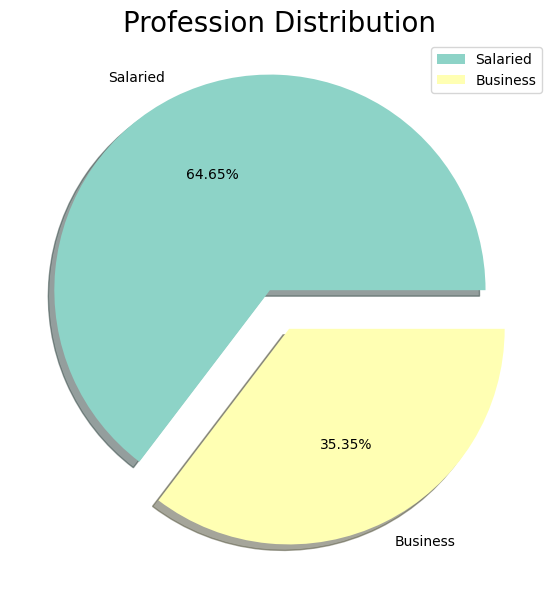

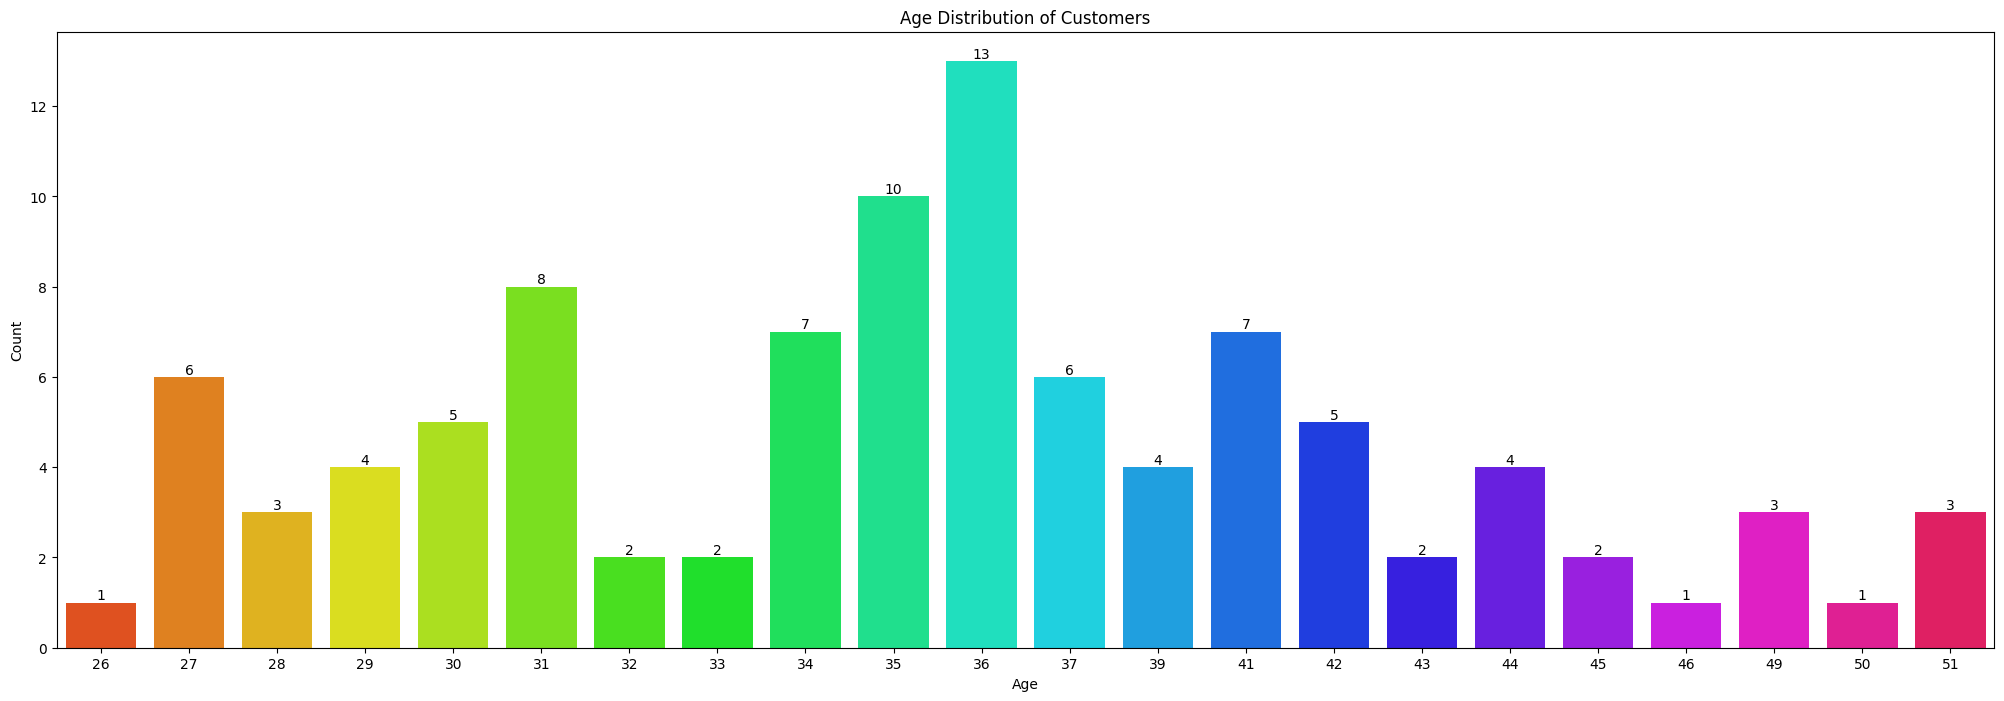

In [11]:
if 'Profession' in df.columns:
    labels = df['Profession'].value_counts().index
    size = df['Profession'].value_counts()
    colors = sns.color_palette("Set3", len(labels))  # Use a color palette
    explode = [0.1] * len(labels)  # Highlight all slices for demonstration

    plt.rcParams['figure.figsize'] = (7, 7)
    plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
    plt.title('Profession Distribution', fontsize=20)
    plt.axis('off')
    plt.legend()
    plt.show()
else:
    print("Column 'Profession' not found in the dataset.")

# Age: Distribution of customers by age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'], palette='hsv')
f.bar_label(f.containers[0])  # Add counts to the bars
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [12]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [13]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = [  'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', ]

for i in cat:
    labelling(i)
df

Age Profession  Marrital Status  Education  No of Dependents  \
0    27   Salaried                1          1                 0   
1    35   Salaried                0          1                 1   
2    45   Business                0          0                 3   
3    41   Business                0          1                 2   
4    31   Salaried                0          1                 1   
..  ...        ...              ...        ...               ...   
94   27   Business                1          0                 0   
95   50   Salaried                0          1                 2   
96   51   Business                0          0                 1   
97   51   Salaried                0          1                 1   
98   51   Salaried                0          1                 1   

    Personal loan  Total Salary    Price  
0               1             1   800000  
1               1            12  1000000  
2               1            10  1200000  
3               0            14  1200000  
4               1            18  1600000  
..            ...           ...      ...  
94              0            16  1600000  
95              0            34  1600000  
96              1            14  1100000  
97              0            28  1500000  
98              1            14  1100000  

[99 rows x 8 columns]

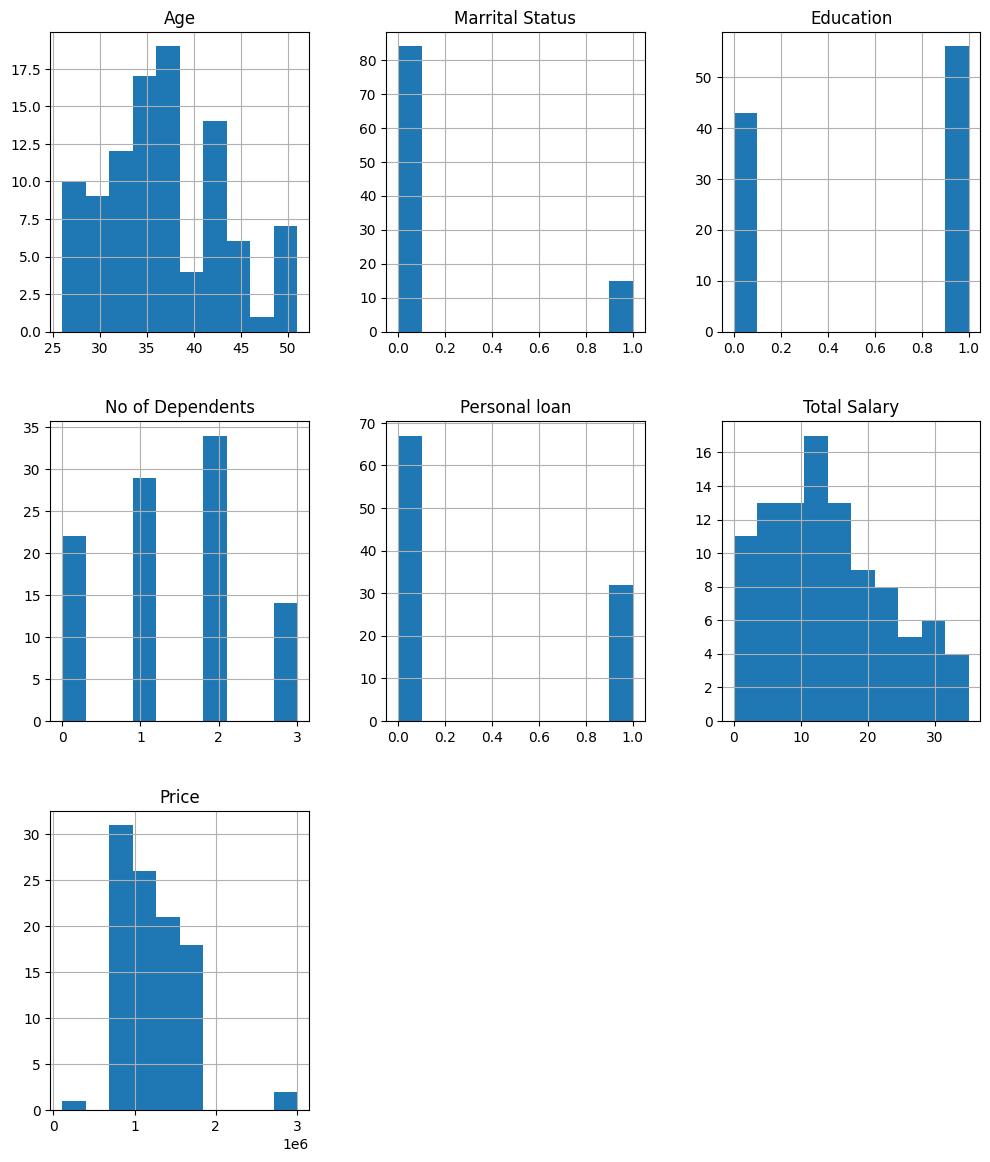

In [14]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [15]:

client_x = df.loc[:,cat]
client_x

Marrital Status  Education  No of Dependents  Personal loan  Total Salary
0                 1          1                 0              1             1
1                 0          1                 1              1            12
2                 0          0                 3              1            10
3                 0          1                 2              0            14
4                 0          1                 1              1            18
..              ...        ...               ...            ...           ...
94                1          0                 0              0            16
95                0          1                 2              0            34
96                0          0                 1              1            14
97                0          1                 1              0            28
98                0          1                 1              1            14

[99 rows x 5 columns]

In [16]:
from sklearn.preprocessing import StandardScaler

#  Handle categorical data
categorical_columns = ["Profession", "Education"]  # List of categorical columns in your dataset

# Encode categorical columns into numeric values
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  
# Scale the data
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Only numeric columns
x_scaled = scaler.fit_transform(df[numeric_columns])



Shape of the dataset: (99, 8)
Explained Variance Ratio for each principal component: [0.3409235  0.19169162 0.14317936]
Total Variance Explained by the components: 0.6757944816139904


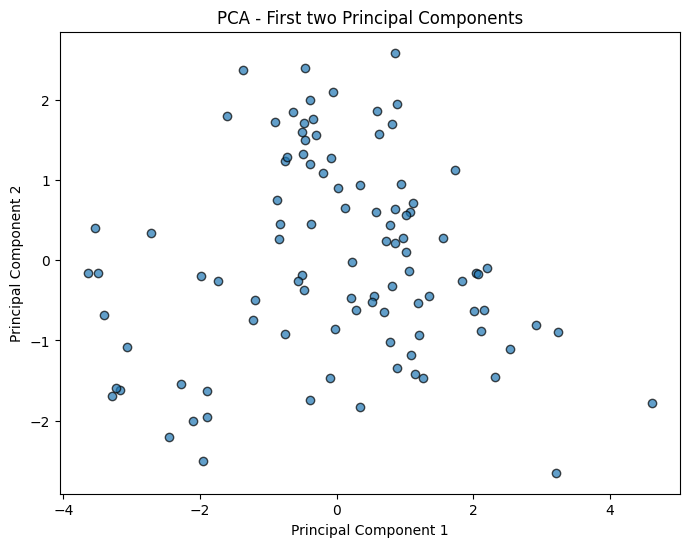

Principal Components (Loadings):
        Age  Profession  Marrital Status  Education  No of Dependents  \
0  0.501476    0.087219        -0.435672   0.067593          0.333079   
1  0.165753   -0.272563        -0.332052  -0.206288          0.509801   
2 -0.008336    0.675914        -0.003848   0.542808          0.021336   

   Personal loan  Total Salary     Price  
0      -0.097959      0.513554  0.402816  
1       0.460983     -0.255178 -0.455964  
2       0.469446      0.023320 -0.164430  
Standard Deviations of each principal component: [1.65988508 1.24466109 1.07569653]


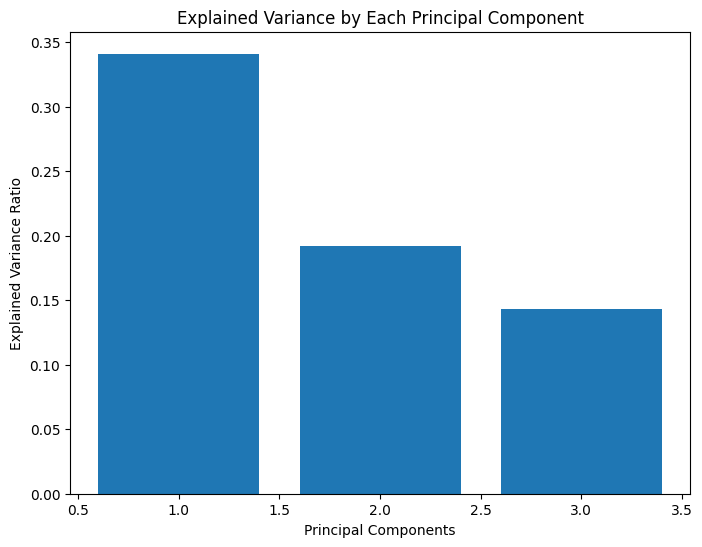

In [17]:
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)  
# Check the shape of the dataset after scaling
print(f"Shape of the dataset: {x_scaled.shape}")

# Perform PCA

n_components = min(x_scaled.shape[0], x_scaled.shape[1]) 
pca = PCA(n_components=3)  
x_pca = pca.fit_transform(x_scaled)

# Explained Variance Ratio 
print(f"Explained Variance Ratio for each principal component: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained by the components: {np.sum(pca.explained_variance_ratio_)}")

#  Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.7, edgecolors="k")
plt.title("PCA - First two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#  Principal Components (loadings)
print(f"Principal Components (Loadings):")
print(pd.DataFrame(pca.components_, columns=df.columns if 'df' in locals() else None))

#  Standard deviation of each principal component
std_dev = np.sqrt(pca.explained_variance_)
print(f"Standard Deviations of each principal component: {std_dev}")

# Plot the explained variance ratio to decide how many components to retain
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Each Principal Component")
plt.show()


In [18]:
#Proportion of Variance 
print("Standard deviation of each principal component:")
print(pca.explained_variance_)
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviation of each principal component:
[2.75521848 1.54918124 1.15712303]

Proportion of variance explained by each principal component:
[0.3409235  0.19169162 0.14317936]

Cumulative proportion of variance explained by each principal component:
[0.3409235  0.53261512 0.67579448]


In [19]:


# Assuming MD_x is your DataFrame with numeric values

# Step 1: Perform PCA
n_components = min(6, client_x.shape[1])  
pca = PCA(n_components=n_components)
pca.fit(client_x)

# Step 2: Get the loadings (components)
loadings = pca.components_

# Step 3: Create the list of principal components
pc_list = ["PC" + str(i) for i in range(1, n_components + 1)]  

# Step 4: Create the DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['variable'] = client_x.columns.values[:n_components]  
loadings_df = loadings_df.set_index('variable')

# Step 5: Display the loadings DataFrame
print(loadings_df)


                       PC1       PC2       PC3       PC4       PC5
variable                                                          
Marrital Status  -0.018666 -0.184924  0.055050  0.063667  0.978964
Education         0.005317 -0.009992  0.981590  0.177913 -0.068555
No of Dependents  0.020177  0.977722  0.037899 -0.082234  0.188291
Personal loan    -0.007758  0.096236 -0.178812  0.978489 -0.035550
Total Salary      0.999578 -0.022389 -0.006346  0.009497  0.014569


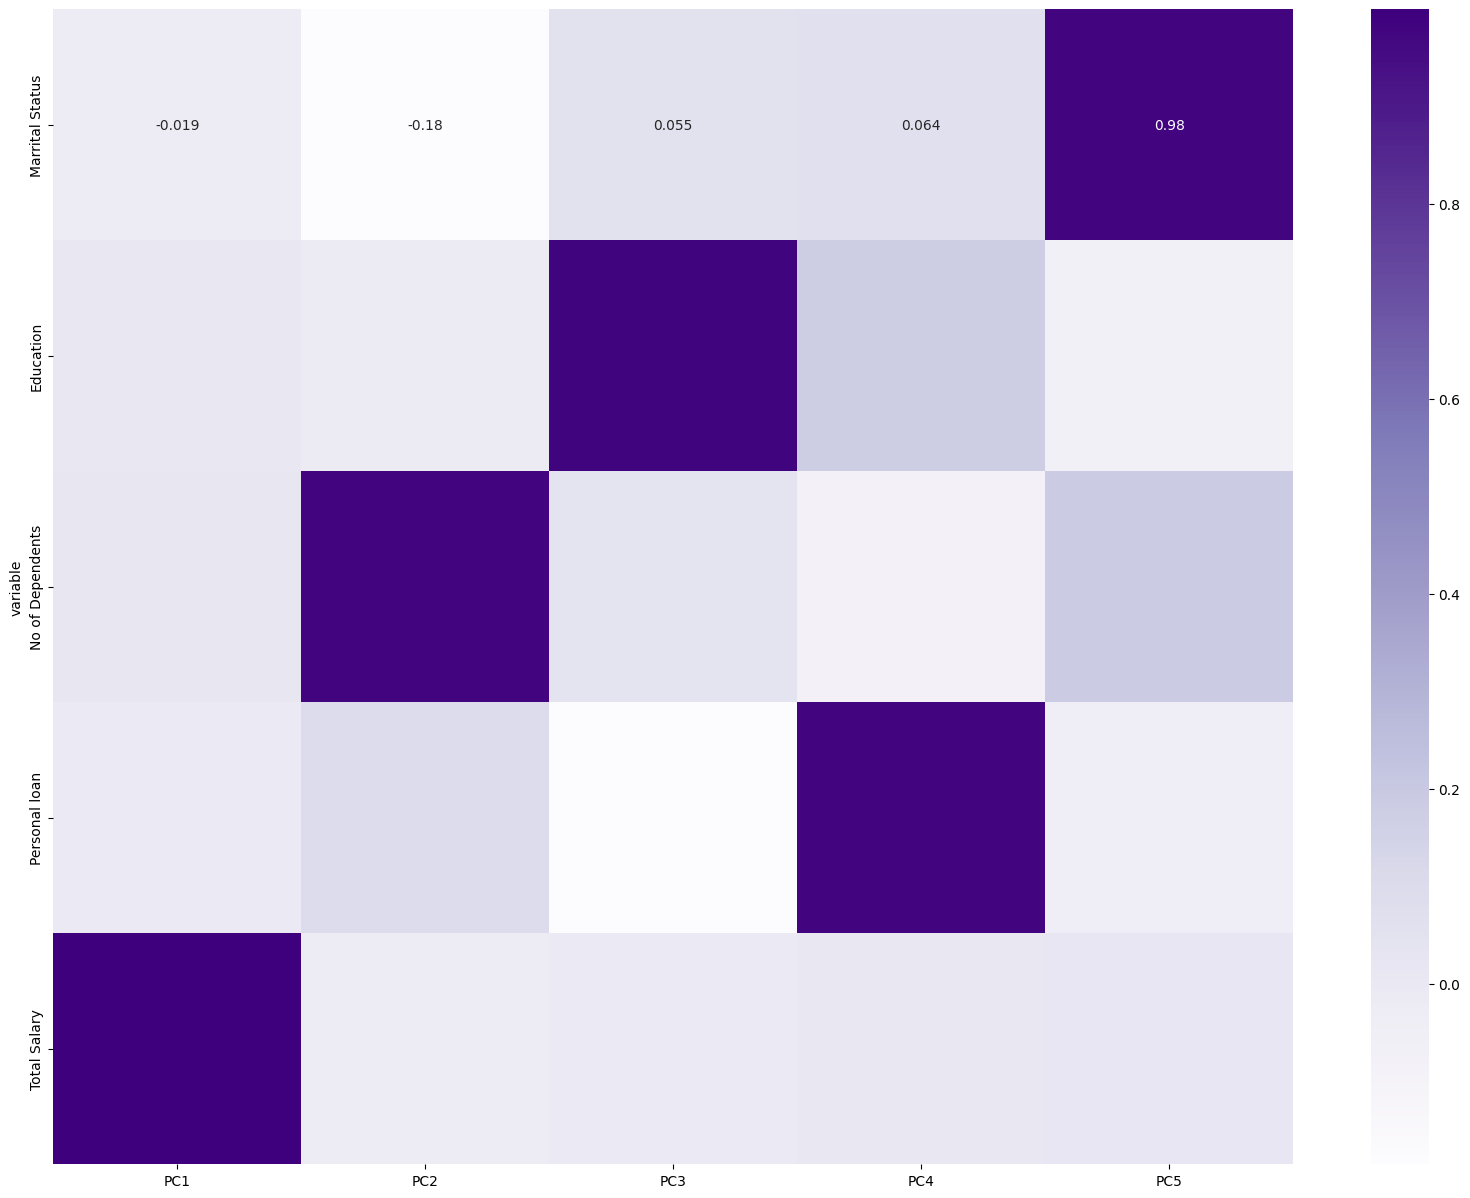

In [20]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')
plt.show()

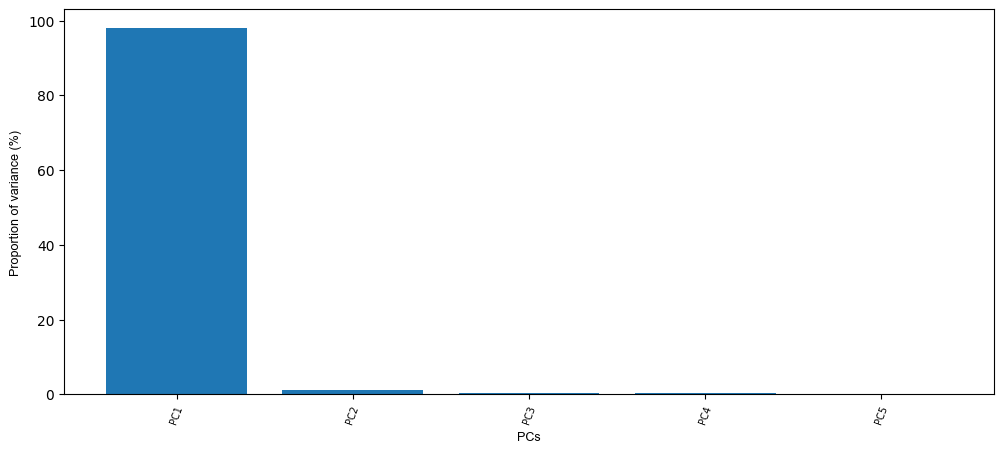

In [21]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(12,5))

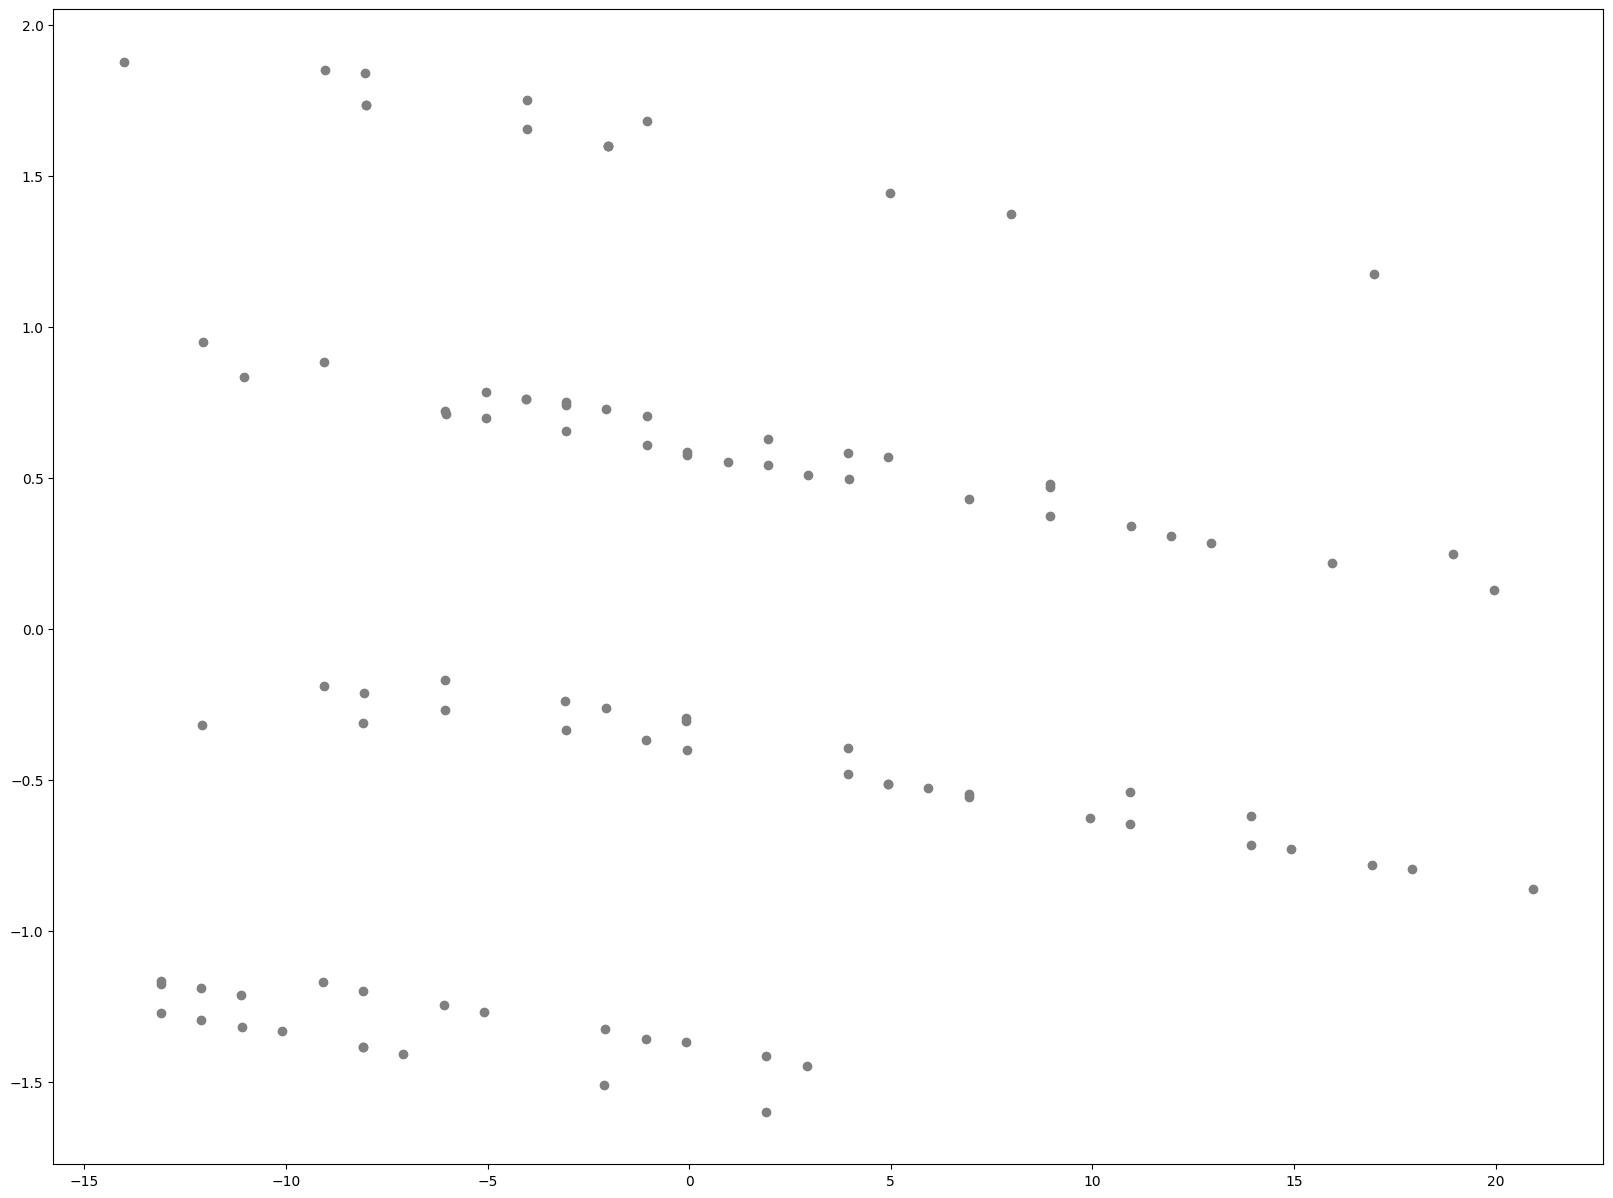

In [22]:
# plot the PCA scores
plt.scatter(pca.fit_transform(client_x)[:, 0], pca.transform(client_x)[:, 1], color="grey")

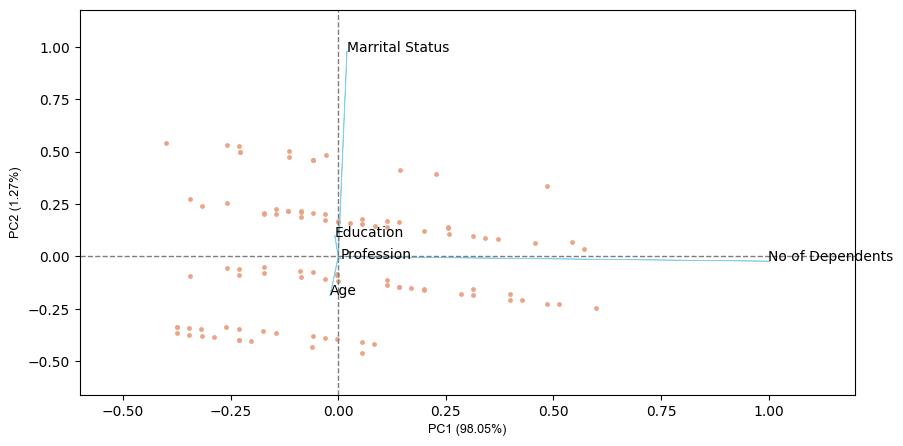

In [23]:
# get PC scores
pca_scores = PCA().fit_transform(client_x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


### 5 Extracting Segment

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


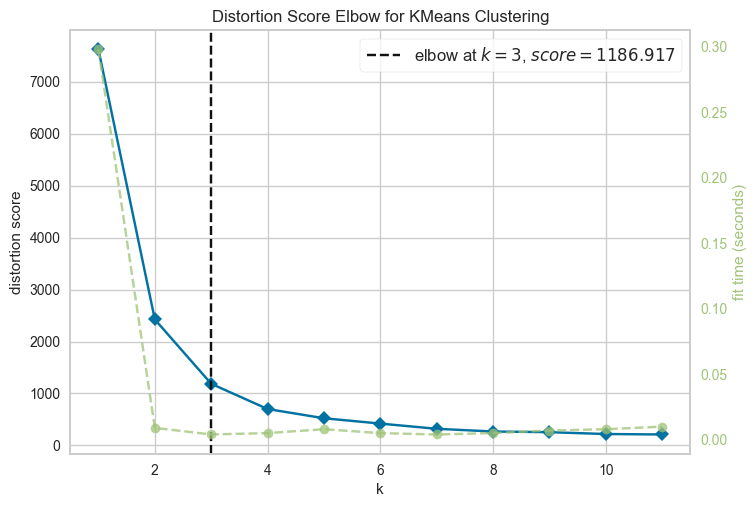

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Import necessary libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Step 1: Initialize the KMeans model
model = KMeans()

# Step 2: Visualize the Elbow Method to determine the optimal number of clusters
# k range is between 1 and 12, assuming you're looking for clusters within this range
visualizer = KElbowVisualizer(model, k=(1, 12))

# Fit the visualizer to the dataset
visualizer.fit(client_x)

# Step 3: Show the plot for Elbow Method
visualizer.show()


In [25]:
# Import necessary libraries
from sklearn.cluster import KMeans



# Step 1: Fit K-means model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# Step 2: Fit the model to the dataset
kmeans.fit(client_x)  # Fit the model to the data (MD_x)

# Step 3: Assign cluster labels to the original dataframe (assuming 'df' is your DataFrame)
df['cluster_num'] = kmeans.labels_

# Step 4: Print the labels assigned to each data point (cluster assignment)
print("Cluster labels for each data point:")
print(kmeans.labels_)

# Step 5: Print the within-cluster sum of squares (inertia)
print("\nWithin-cluster sum of squares (inertia):")
print(kmeans.inertia_)

# Step 6: Print the number of iterations taken to converge
print("\nNumber of iterations to converge:")
print(kmeans.n_iter_)

# Step 7: Print the centroids of each cluster
print("\nCentroids of each cluster:")
print(kmeans.cluster_centers_)


Cluster labels for each data point:
[1 3 3 3 2 1 3 1 3 3 3 1 3 1 1 0 1 1 1 1 2 3 3 1 3 2 1 1 2 2 1 3 2 3 3 0 1
 3 1 3 3 1 3 3 1 2 1 2 1 2 3 0 2 0 0 2 2 1 1 1 1 1 3 3 3 1 2 3 0 3 2 2 1 2
 3 2 3 2 2 0 3 0 3 2 2 3 1 3 0 3 1 0 2 1 3 0 3 0 3]

Within-cluster sum of squares (inertia):
704.7424242424241

Number of iterations to converge:
5

Centroids of each cluster:
[[-2.77555756e-17  7.50000000e-01  1.58333333e+00  1.66666667e-01
   3.03333333e+01]
 [ 4.33333333e-01  5.66666667e-01  1.03333333e+00  3.33333333e-01
   4.63333333e+00]
 [ 2.77555756e-17  5.90909091e-01  1.54545455e+00  2.72727273e-01
   2.06818182e+01]
 [ 5.71428571e-02  4.85714286e-01  1.57142857e+00  4.00000000e-01
   1.24000000e+01]]


In [26]:
from collections import Counter

# Step 1: Count the size of each cluster
cluster_sizes = Counter(kmeans.labels_)

# Step 2: Print the size of each cluster
print("Cluster sizes:")
print(cluster_sizes)


Cluster sizes:
Counter({3: 35, 1: 30, 2: 22, 0: 12})


In [27]:
# Select the columns with numerical data
numerical_cols = ['Age', 'No of Dependents', 'Total Salary', 'Price']

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

# Apply PCA
pca = PCA(n_components=2) 
pca_components = pca.fit_transform(X_scaled)

# Add PCA components as new columns to the DataFrame
df[['pc1', 'pc2']] = pca_components


In [28]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df[['pc1', 'pc2']])
df['cluster_num'] = kmeans.labels_


Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price', 'cluster_num', 'pc1', 'pc2'],
      dtype='object')


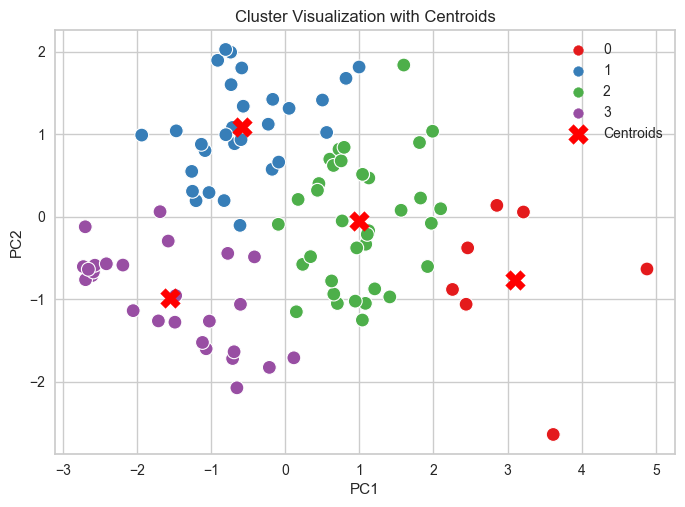

In [29]:
print(df.columns)

# Assuming 'pc1' and 'pc2' are the correct column names
# Step 1: Create a scatter plot of the data points with 'pc1' and 'pc2'
sns.scatterplot(data=df, x="pc1", y="pc2", hue=kmeans.labels_, palette="Set1", s=100)

# Step 2: Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="red", s=200, label="Centroids")

# Step 3: Add a legend and show the plot
plt.legend()
plt.title('Cluster Visualization with Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


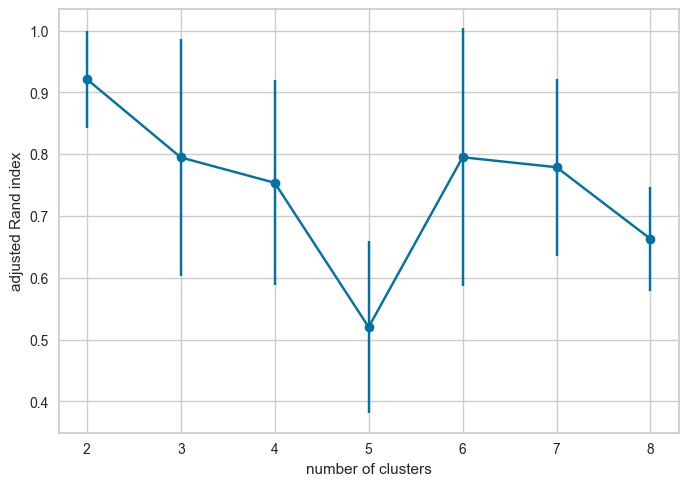

In [31]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(client_x)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(client_x)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [32]:
# Count the frequency of each value in the 'Profession' column
profession_counts = df["Profession"].value_counts()

# Reverse the order of the resulting Series
profession_counts = profession_counts.iloc[::-1]

# Print the results
print(profession_counts)




0    35
1    64
Name: Profession, dtype: int64


In [ ]:
# Convert the 'Total Salary' column to numeric and subtract from 100 to create a new column
df["Total_Salary.n"] = 100 - pd.to_numeric(df["Total Salary"], errors="coerce")

# Count the frequency of each value in the "Total_Salary.n" column
total_salary_n_counts = df["Total_Salary.n"].value_counts()

# Print the results
print(total_salary_n_counts)


### 6. Profiling Segment

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
# Select numeric columns from the DataFrame 
numeric_columns = df[["Age", "Total Salary", "Price", "No of Dependents"]]  # Update with your chosen columns

# Transpose the DataFrame so that columns are treated as rows
D = np.transpose(numeric_columns)

# Compute pairwise distances using hierarchical clustering (average linkage method)
D_linkage = linkage(D, method="average")

# Print the linkage matrix 
print(D_linkage)


[[1.00000000e+00 3.00000000e+00 1.52062487e+02 2.00000000e+00]
 [0.00000000e+00 4.00000000e+00 2.92152721e+02 3.00000000e+00]
 [2.00000000e+00 5.00000000e+00 1.26458597e+07 4.00000000e+00]]


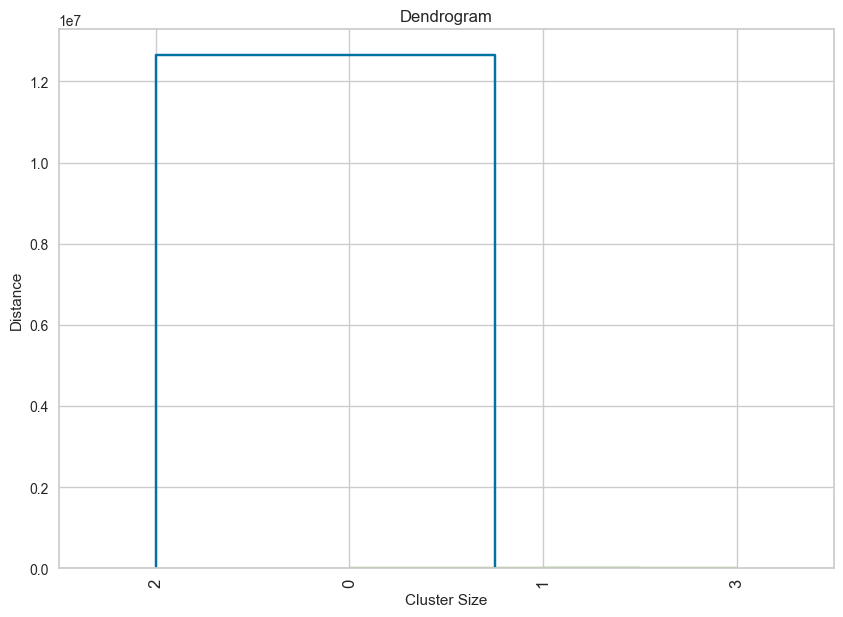

In [36]:
from scipy.cluster.hierarchy import dendrogram

# Select numeric columns from the DataFrame 
numeric_columns = df[["Age", "Total Salary", "Price", "No of Dependents"]]  # Update with your selected columns

# Transpose the DataFrame for clustering
D = np.transpose(numeric_columns)
# Compute the linkage matrix using average linkage method
D_linkage = linkage(D, method="average")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(D_linkage, truncate_mode="lastp", p=12, leaf_rotation=90,
           leaf_font_size=12, show_contracted=True)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


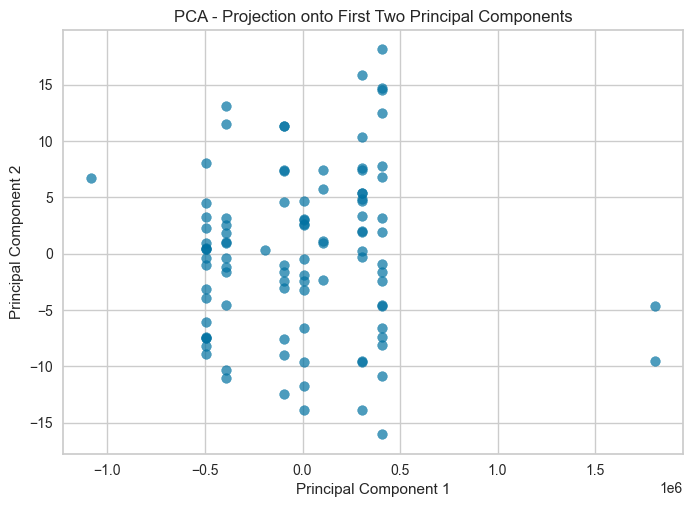

In [37]:
# Assuming your DataFrame is 'df' and numeric columns are selected for PCA
numeric_columns = df[["Age", "Total Salary", "Price", "No of Dependents"]]  # Replace with actual numeric columns

# Apply PCA
pca = PCA(n_components=2)  
proj_data = pca.fit_transform(numeric_columns)

# Plot the scatter plot for the first two principal components
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Projection onto First Two Principal Components")
plt.show()


### 7. Describing Segment

Profession    0   1
cluster_num        
0             1   6
1            15  15
2            10  26
3             9  17


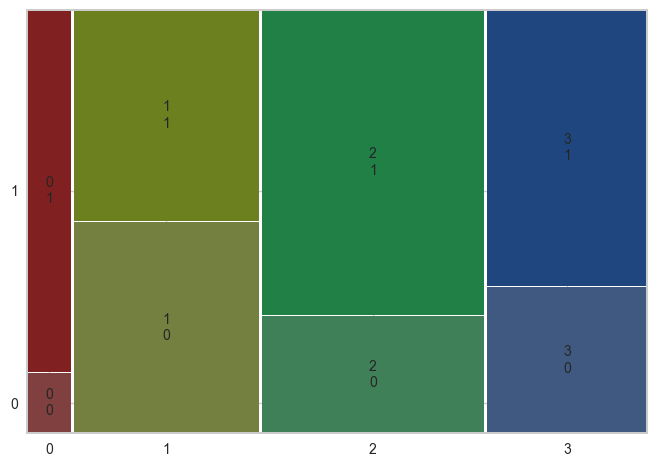

In [38]:

from statsmodels.graphics.mosaicplot import mosaic

# Create a crosstab for 'cluster_num' and a relevant column 
crosstab = pd.crosstab(df['cluster_num'], df['Profession'])  
print(crosstab)

# Optionally, you can visualize this crosstab using a mosaic plot
mosaic(crosstab.stack())
plt.show()


In [39]:
#Mosaic plot gender vs segment
crosstab_profession =pd.crosstab(df['cluster_num'],df['Profession'])
crosstab_profession

Profession    0   1
cluster_num        
0             1   6
1            15  15
2            10  26
3             9  17

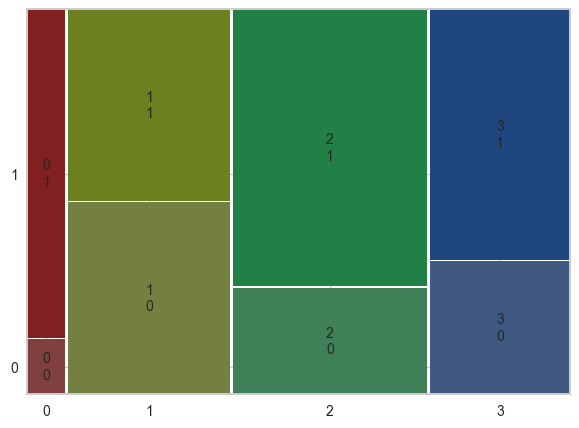

In [40]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_profession.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

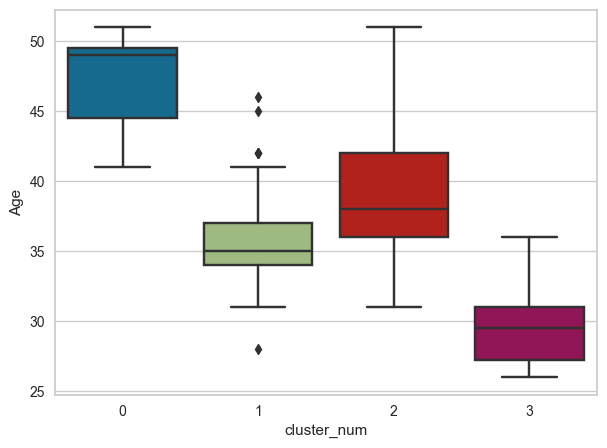

In [41]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [42]:
from sklearn.preprocessing import LabelEncoder
# Apply LabelEncoder to the 'Total Salary' column if needed
df['Total_Salary.n'] = LabelEncoder().fit_transform(df['Total_Salary.n'])
salary = df.groupby('cluster_num')['Total_Salary.n'].mean()

# Reset the index and convert to DataFrame
salary = salary.to_frame().reset_index()

# Show the result
print(salary)


   cluster_num  Total_Salary.n
0            0        3.428571
1            1       26.366667
2            2       15.194444
3            3       27.346154


In [43]:
# Import necessary library
from sklearn.preprocessing import LabelEncoder
# Group by 'cluster_num' and calculate the mean of the 'Age' column
age_mean = df.groupby('cluster_num')['Age'].mean()

# Reset the index and convert to DataFrame
age_mean = age_mean.to_frame().reset_index()

# Show the result
print(age_mean)


   cluster_num        Age
0            0  47.000000
1            1  36.033333
2            2  39.277778
3            3  29.653846


In [44]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Education' column
df['Education'] = LabelEncoder().fit_transform(df['Education'])

# Group by 'cluster_num' and calculate the mean of the 'Education' column
education_mean = df.groupby('cluster_num')['Education'].mean()

# Reset the index and convert to DataFrame
education_mean = education_mean.to_frame().reset_index()

# Show the result
print(education_mean)


   cluster_num  Education
0            0   0.714286
1            1   0.433333
2            2   0.638889
3            3   0.576923


In [45]:
# Calculate the mean for 'Total Salary', 'No of Dependents', and 'Marrital Status'
total_salary_mean = df.groupby('cluster_num')['Total Salary'].mean().to_frame().reset_index()
no_of_dependents_mean = df.groupby('cluster_num')['No of Dependents'].mean().to_frame().reset_index()
marrital_status_mean = df.groupby('cluster_num')['Marrital Status'].mean().to_frame().reset_index()

# Merge the means for 'Total Salary', 'No of Dependents', and 'Marrital Status' based on 'cluster_num'
segment = total_salary_mean.merge(no_of_dependents_mean, on='cluster_num', how='left').merge(marrital_status_mean, on='cluster_num', how='left')

# Display the merged result
print(segment)


   cluster_num  Total Salary  No of Dependents  Marrital Status
0            0     31.571429          1.571429         0.000000
1            1      8.633333          2.100000         0.000000
2            2     19.805556          1.694444         0.000000
3            3      7.653846          0.153846         0.576923


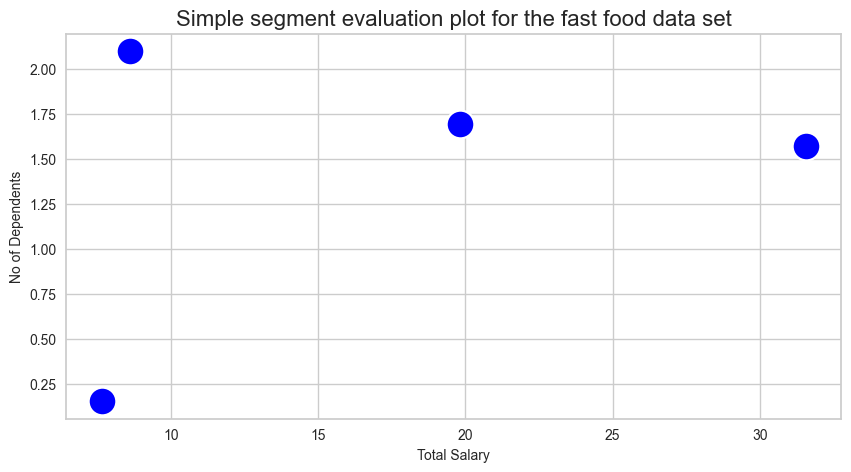

In [46]:
# Target segments: Scatter plot using "Total Salary" and "No of Dependents"

plt.figure(figsize=(10, 5))
sns.scatterplot(x="Total Salary", y="No of Dependents", data=segment, s=400, color="blue")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize=16)
plt.xlabel("Total Salary", fontsize=10)
plt.ylabel("No of Dependents", fontsize=10)
plt.show()


## Dataset2 'car_dekho_resale.csv'

In [47]:
df = pd.read_csv('car_dekho_resale.csv')
df

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [48]:
df.head

<bound method NDFrame.head of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission        

In [49]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [51]:
# Counting unique values for specific columns
fuel_counts = df['fuel'].value_counts()
seller_type_counts = df['seller_type'].value_counts()
transmission_counts = df['transmission'].value_counts()

# Displaying the counts
print("Fuel Types Counts:\n", fuel_counts)
print("\nSeller Types Counts:\n", seller_type_counts)
print("\nTransmission Types Counts:\n", transmission_counts)


Fuel Types Counts:
 Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

Seller Types Counts:
 Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

Transmission Types Counts:
 Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [52]:
# Convert 'Manual' values to 1 and other values to 0 for relevant columns
binary_data = (df.iloc[:, :] == "Manual").astype(int)

# Calculate column means (proportion of 'Manual' responses)
column_means = binary_data.mean().round(2)

# Print the results
print("Proportion of 'Manual' responses in each column:")
print(column_means)


Proportion of 'Manual' responses in each column:
name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.9
owner            0.0
dtype: float64


In [53]:
# Select the first 11 attributes
subset_data = df.iloc[:, :11]  

# Display the selected data
print("Subset of first 11 attributes:")
print(subset_data)


Subset of first 11 attributes:
                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission       

### 4 Exploring Data

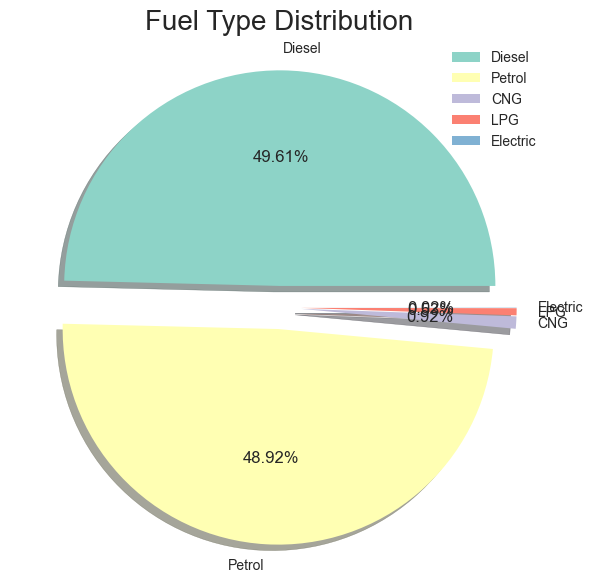

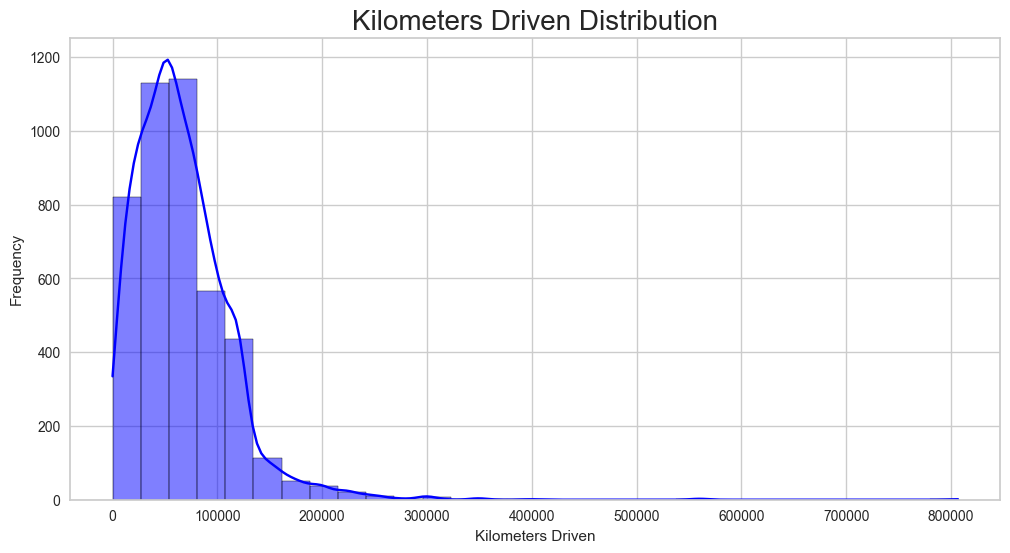

In [54]:
# Fuel Type: Distribution in a pie chart
if 'fuel' in df.columns:
    labels = df['fuel'].value_counts().index
    size = df['fuel'].value_counts()
    colors = sns.color_palette("Set3", len(labels))  
    explode = [0.1] * len(labels)  

    plt.rcParams['figure.figsize'] = (7, 7)
    plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
    plt.title('Fuel Type Distribution', fontsize=20)
    plt.axis('off')
    plt.legend()
    plt.show()
else:
    print("Column 'fuel' not found in the dataset.")

# Kilometers Driven: Distribution in a histogram
if 'km_driven' in df.columns:
    plt.rcParams['figure.figsize'] = (12, 6)
    sns.histplot(df['km_driven'], kde=True, bins=30, color='blue')
    plt.title('Kilometers Driven Distribution', fontsize=20)
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'km_driven' not found in the dataset.")


In [55]:
from sklearn.preprocessing import LabelEncoder

# Function to apply label encoding
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

# Categorical columns to encode
cat_columns = ['fuel', 'seller_type', 'transmission', 'owner']  # Replace or add columns as needed

for col in cat_columns:
    labelling(col)

# Display the updated DataFrame
df


name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

      fuel  seller_type  transmission  owner  
0        4            1             1      0  
1        4            1             1      0  
2        1            1             1      0  
3        4            1             1      0  
4        1            1             1      2  
...    ...          ...           ...    ...  
4335     1            1             1      2  
4336     1            1             1      2  
4337     4            1             1      2  
4338     1            1             1      0  
4339     4            1             1      0  

[4340 rows x 8 columns]

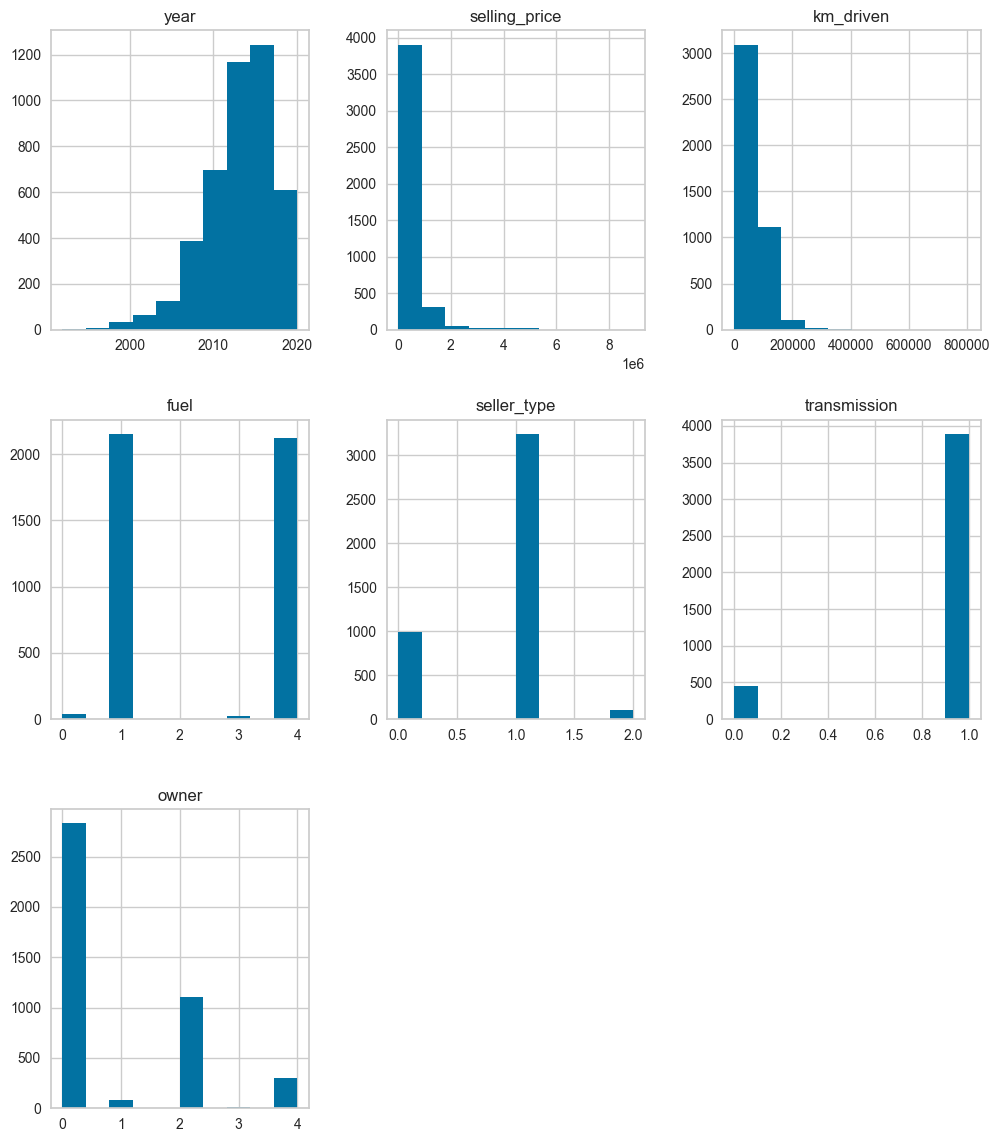

In [56]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [57]:
# Considering only the categorical columns
selected_columns = ['fuel', 'seller_type', 'transmission', 'owner']  
car_x = df.loc[:, selected_columns]

# Display the selected DataFrame
car_x


fuel  seller_type  transmission  owner
0        4            1             1      0
1        4            1             1      0
2        1            1             1      0
3        4            1             1      0
4        1            1             1      2
...    ...          ...           ...    ...
4335     1            1             1      2
4336     1            1             1      2
4337     4            1             1      2
4338     1            1             1      0
4339     4            1             1      0

[4340 rows x 4 columns]

In [58]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Handle categorical data
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']  # List of categorical columns in your dataset

# Encode categorical columns into numeric values
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

# Step 2: Scale the data
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns  
x_scaled = scaler.fit_transform(df[numeric_columns])

# Display the scaled data
x_scaled


array([[-1.44507431, -0.76774602,  0.08113906, ...,  0.44819164,
         0.33927557, -0.66507931],
       [-1.44507431, -0.63809636, -0.3476891 , ...,  0.44819164,
         0.33927557, -0.66507931],
       [-0.2587948 ,  0.16573147,  0.7243813 , ...,  0.44819164,
         0.33927557, -0.66507931],
       ...,
       [-0.97056251, -0.68131292,  0.35987736, ...,  0.44819164,
         0.33927557,  0.95651856],
       [ 0.69022881,  0.62382691,  0.50996722, ...,  0.44819164,
         0.33927557, -0.66507931],
       [ 0.69022881, -0.48251678, -0.56210318, ...,  0.44819164,
         0.33927557, -0.66507931]])

Shape of the dataset: (4340, 7)
Explained Variance Ratio for each principal component: [0.31991064 0.19849121 0.14645324]
Total Variance Explained by the components: 0.6648550841216025


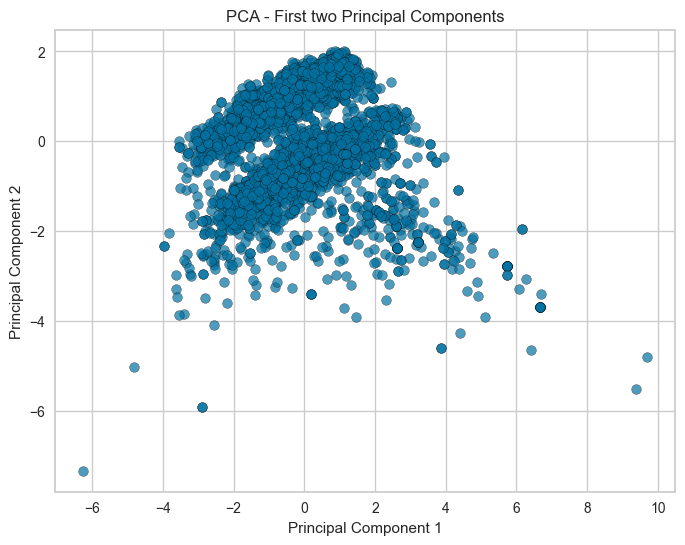

Principal Components (Loadings):
       year  selling_price  km_driven      fuel  seller_type  transmission  \
0  0.497852       0.498000  -0.379469 -0.084791    -0.243052     -0.369839   
1  0.128406      -0.363628  -0.517251  0.637236     0.051754      0.321128   
2  0.396022      -0.086356   0.098846 -0.509852     0.347511      0.572041   

      owner  
0 -0.396356  
1 -0.268079  
2 -0.343504  
Standard Deviations of each principal component: [1.49662639 1.17888027 1.01262478]


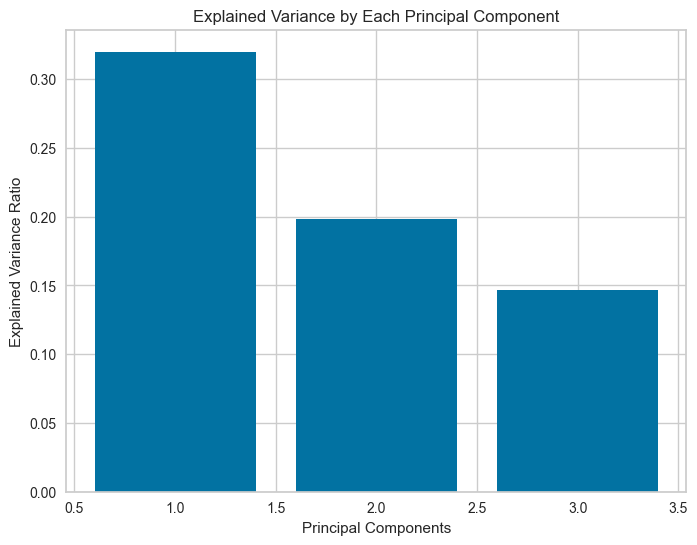

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Only numeric columns
print(f"Shape of the dataset: {x_scaled.shape}")

# Step 2: Perform PCA
n_components = min(x_scaled.shape[0], x_scaled.shape[1])  
pca = PCA(n_components=3)  
x_pca = pca.fit_transform(x_scaled)

# Explained Variance Ratio 
print(f"Explained Variance Ratio for each principal component: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained by the components: {np.sum(pca.explained_variance_ratio_)}")

# Step 3: Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.7, edgecolors="k")
plt.title("PCA - First two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 4: Principal Components 
print(f"Principal Components (Loadings):")
print(pd.DataFrame(pca.components_, columns=df.select_dtypes(include=[np.number]).columns))

# Step 5: Standard deviation of each principal component
std_dev = np.sqrt(pca.explained_variance_)
print(f"Standard Deviations of each principal component: {std_dev}")

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Each Principal Component")
plt.show()


In [60]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df) 
# Standardizing the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=11)  
pca.fit(df_scaled)



PCA(n_components=11)

In [61]:
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df)

# Standardizing the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform PCA with n_components equal to the number of features in your dataset
pca = PCA(n_components=6)  
pca.fit(df_scaled)

# Get the loadings 
loadings = pca.components_

# Create the list of principal components
pc_list = ["PC" + str(i) for i in range(1, 7)]  # For 6 components

# Create the DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['variable'] = df_encoded.columns.values  # Variable names from the encoded dataset
loadings_df = loadings_df.set_index('variable')

# Display the loadings DataFrame
print(loadings_df)


                                               PC1       PC2       PC3  \
variable                                                                 
year                                      0.416796  0.142231  0.313489   
selling_price                             0.443310 -0.231336 -0.076295   
km_driven                                -0.289427 -0.401061  0.004453   
fuel                                     -0.090476  0.524698 -0.353909   
seller_type                              -0.189081  0.020969  0.134181   
...                                            ...       ...       ...   
name_Volkswagen Vento Petrol Highline AT  0.003202 -0.004609 -0.049057   
name_Volvo V40 D3 R Design                0.024705 -0.011272 -0.014903   
name_Volvo XC 90 D5 Inscription BSIV      0.032157 -0.028952 -0.014924   
name_Volvo XC60 D3 Kinetic                0.008379 -0.029327 -0.030076   
name_Volvo XC60 D5 Inscription            0.014364 -0.023487 -0.014868   

                                     

In [62]:
# Display the summary statistics
print("Standard deviation of each principal component:")
print(np.sqrt(pca.explained_variance_))

print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)

print("\nCumulative proportion of variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_))


Standard deviation of each principal component:
[1.77598275 1.5254268  1.40696206 1.30611386 1.08965166 1.05147814]

Proportion of variance explained by each principal component:
[0.00210507 0.001553   0.00132115 0.00113854 0.00079243 0.00073788]

Cumulative proportion of variance explained by each principal component:
[0.00210507 0.00365806 0.00497922 0.00611776 0.0069102  0.00764808]


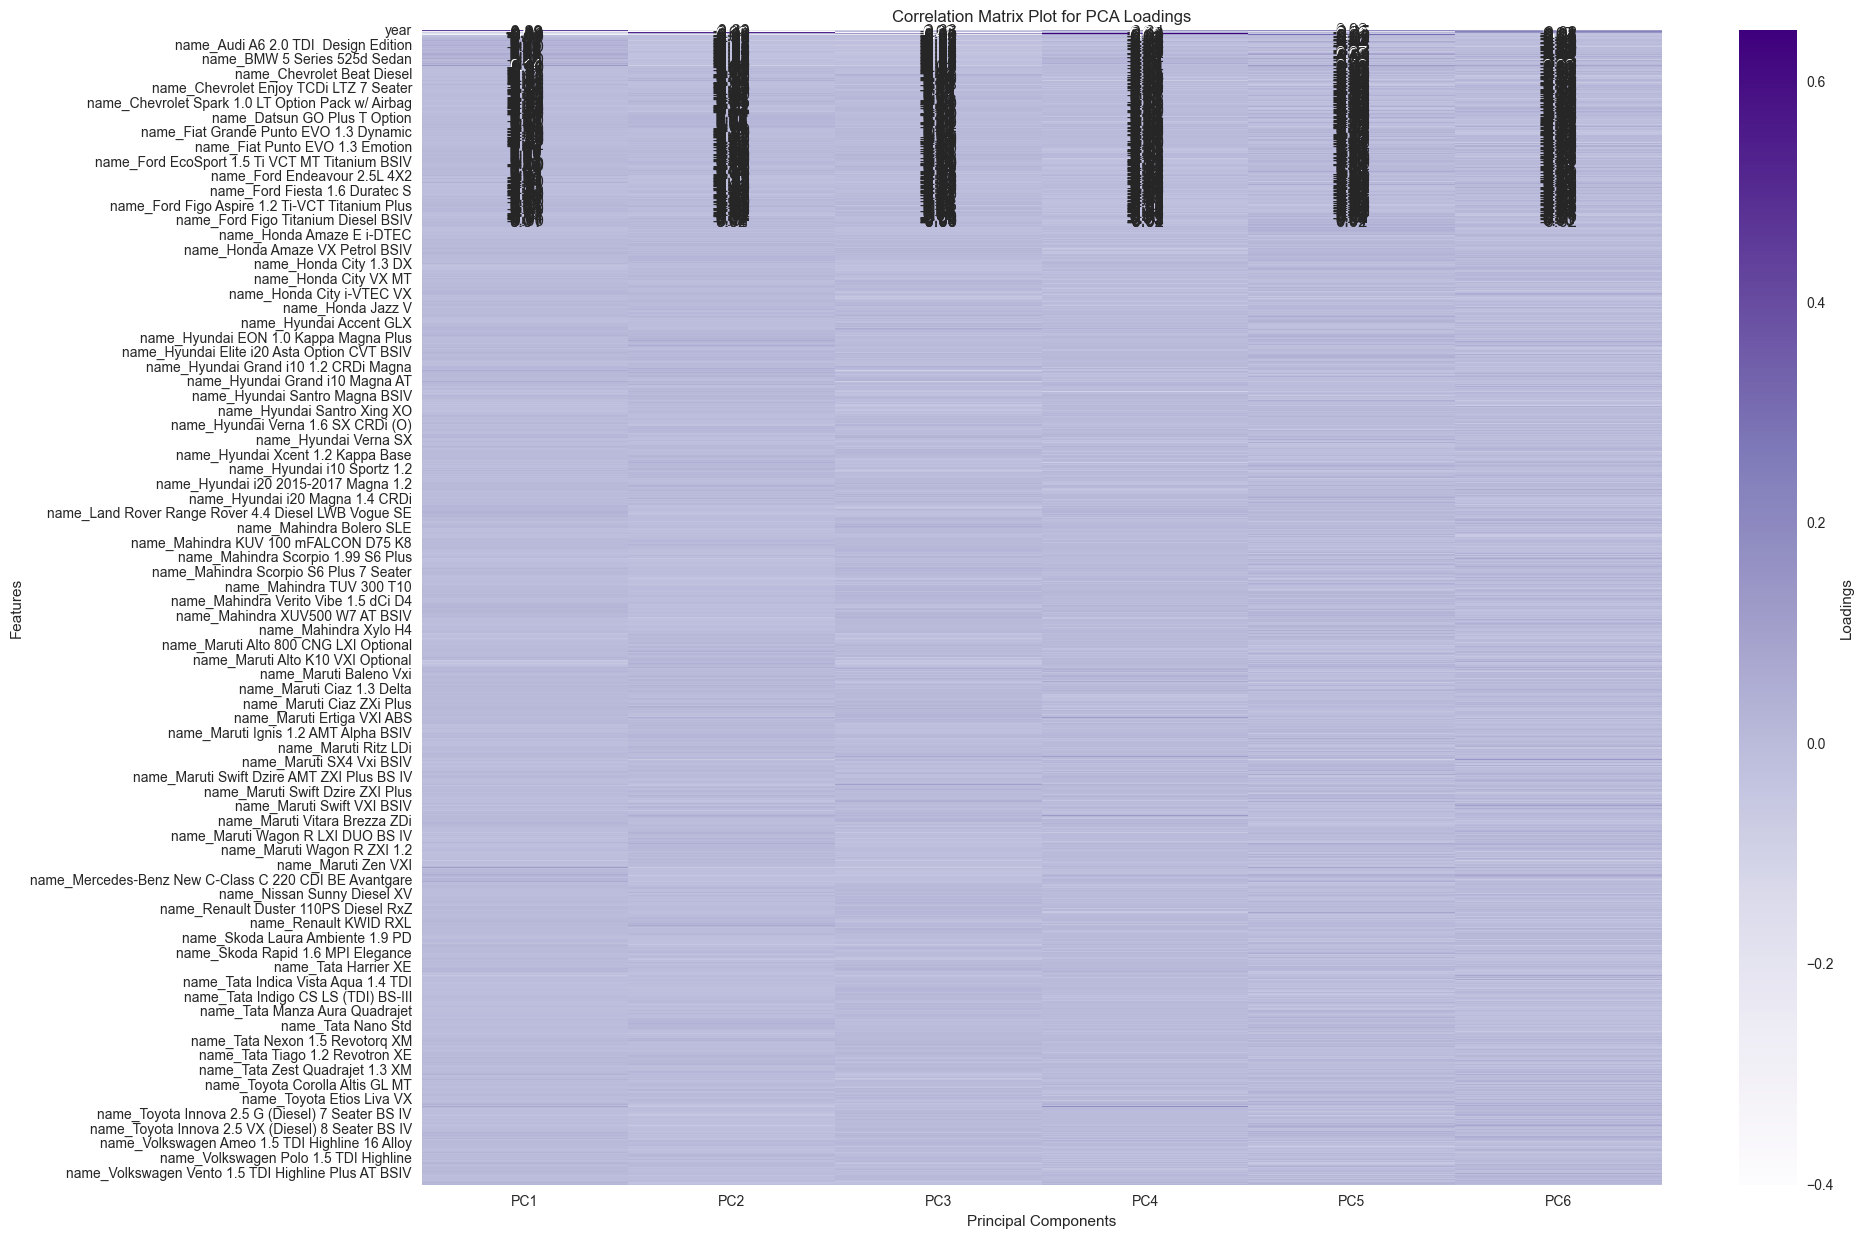

In [63]:
# Plot the correlation matrix
plt.rcParams['figure.figsize'] = (20, 15)  # Set the figure size
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples', fmt=".2f", cbar_kws={'label': 'Loadings'})  # Heatmap with annotations
plt.title("Correlation Matrix Plot for PCA Loadings")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()


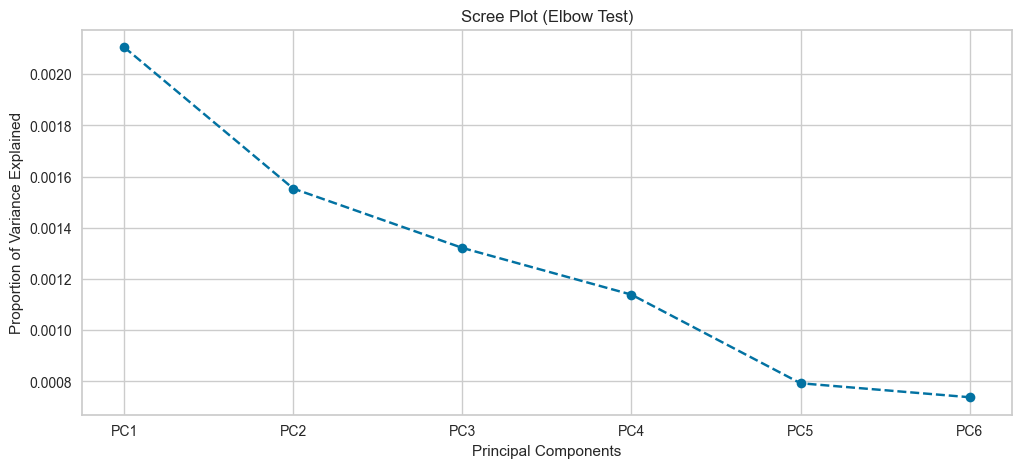

In [64]:
# Scree Plot (Elbow Test) for PCA
plt.figure(figsize=(12, 5))  
pc_list = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]  
plt.plot(pc_list, pca.explained_variance_ratio_, marker='o', linestyle='--', color='b') 
plt.title('Scree Plot (Elbow Test)')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True) 
plt.show()


In [65]:
# Transform the data using PCA
pca_scores = pca.transform(df_scaled) 
# Scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color="grey", alpha=0.6)
plt.title("PCA Score Plot (First Two Principal Components)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True)  
plt.show()


### 5 Extracting Segmnet

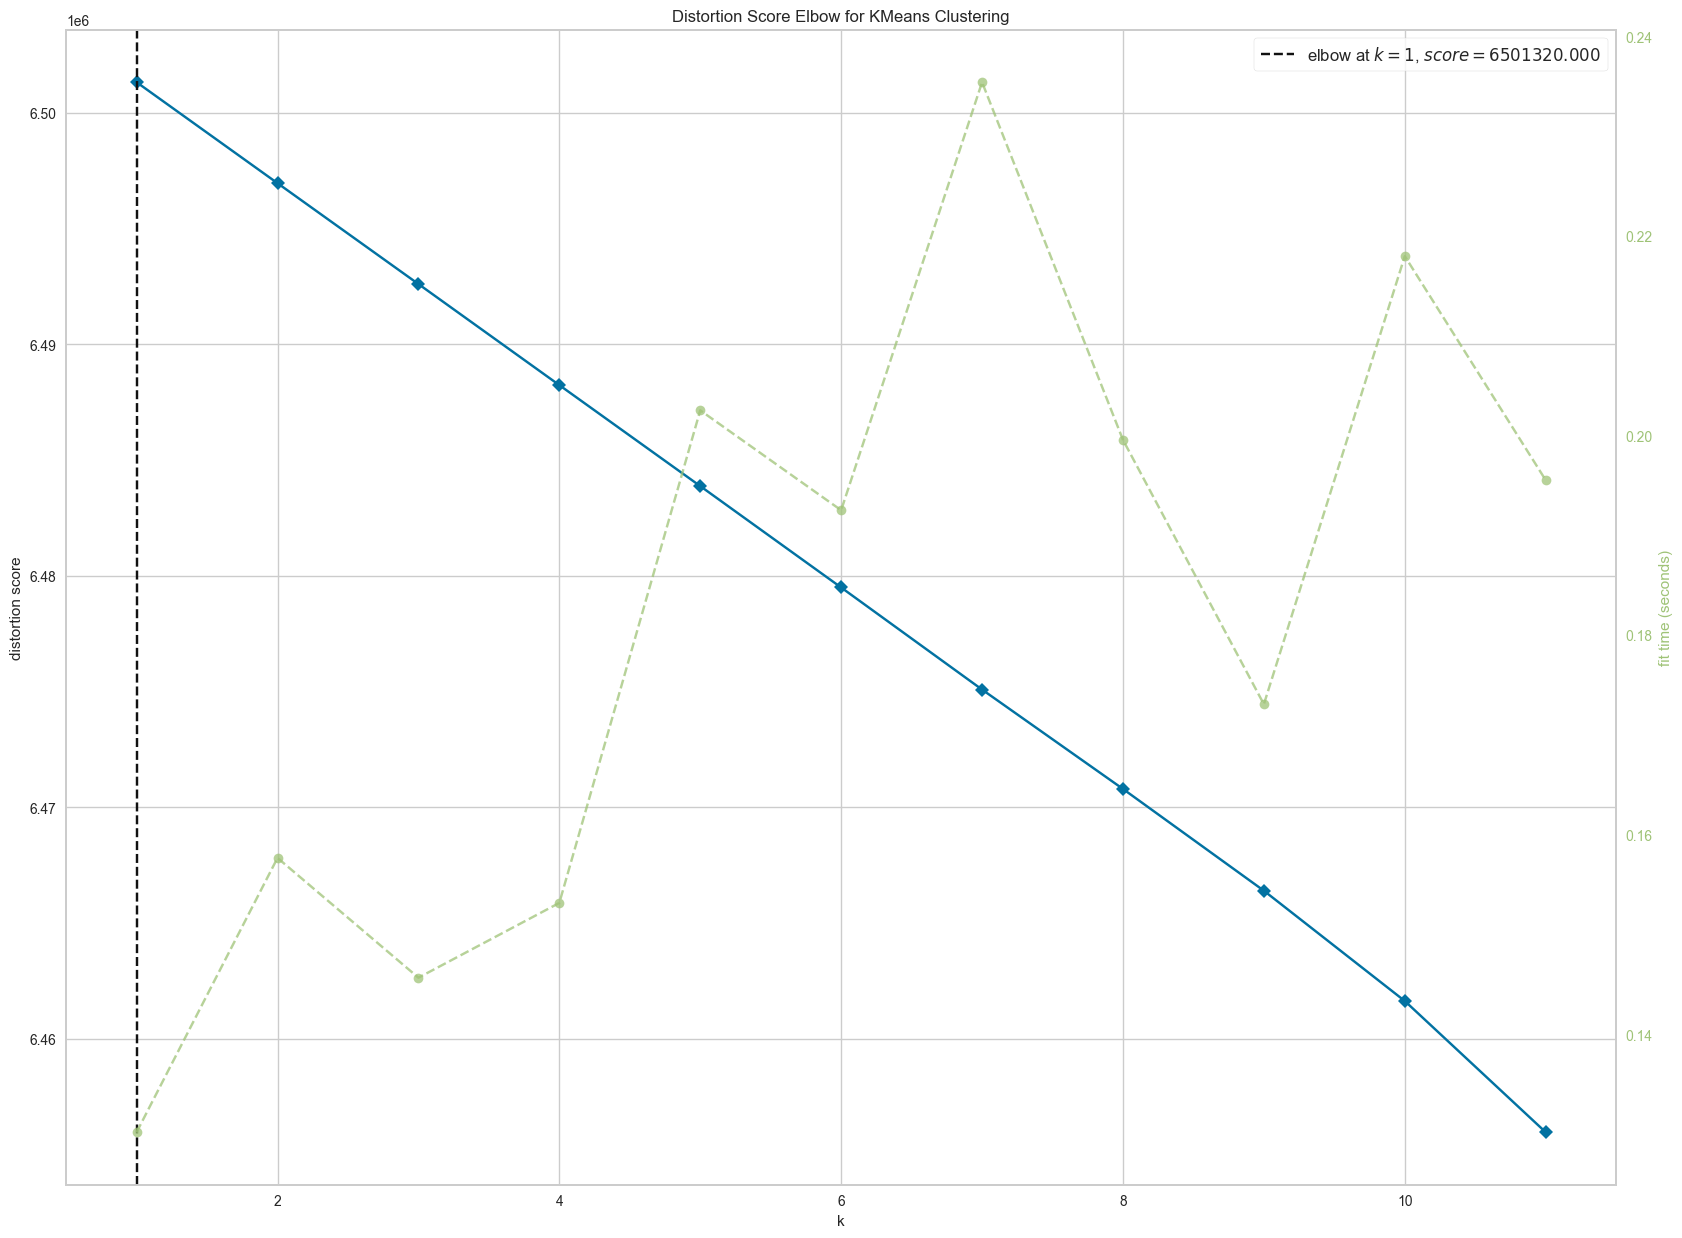

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#  Initialize the KMeans model
model = KMeans()

#  Visualize the Elbow Method 

visualizer = KElbowVisualizer(model, k=(1, 12))

# Fit the visualizer to the scaled dataset
visualizer.fit(df_scaled)

#  Show the plot for Elbow Method
visualizer.show()


In [67]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

#  Fit the model to the scaled dataset
kmeans.fit(df_scaled)

#  Assign cluster labels 
df['cluster_num'] = kmeans.labels_  

# Print the labels assigned to each data point (cluster assignment)
print("Cluster labels for each data point:")
print(kmeans.labels_)

#  Print the within-cluster sum of squares (inertia)
print("\nWithin-cluster sum of squares (inertia):")
print(kmeans.inertia_)

#  Print the number of iterations taken to converge
print("\nNumber of iterations to converge:")
print(kmeans.n_iter_)

#  Print the centroids of each cluster
print("\nCentroids of each cluster:")
print(kmeans.cluster_centers_)


Cluster labels for each data point:
[1 1 1 ... 1 1 1]

Within-cluster sum of squares (inertia):
6488233.981255714

Number of iterations to converge:
2

Centroids of each cluster:
[[ 7.61405576e-01  4.05151165e-01 -9.68246262e-02 ... -1.51811676e-02
  -1.51811676e-02 -1.51811676e-02]
 [-2.41776648e-03 -1.06578104e-03 -4.78582838e-04 ...  7.73473106e-05
   7.73473106e-05  7.73473106e-05]
 [ 8.11808788e-03 -4.02782247e-01  3.97740211e-01 ... -1.51811676e-02
  -1.51811676e-02 -1.51811676e-02]
 [ 6.90228805e-01  9.43197219e-01 -3.67886837e-02 ... -1.51811676e-02
  -1.51811676e-02 -1.51811676e-02]]


In [68]:
from collections import Counter

#  Count the size of each cluster
cluster_sizes = Counter(df['cluster_num'])  
#  Print the size of each cluster
print("Cluster sizes:")
print(cluster_sizes)


Cluster sizes:
Counter({1: 4318, 0: 10, 2: 8, 3: 4})


In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  Select the numerical columns for PCA
numerical_cols = ['selling_price', 'km_driven', 'year']  

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

#  Apply PCA
pca = PCA(n_components=2)  
pca_components = pca.fit_transform(X_scaled)

# Add PCA components as new columns to the DataFrame
df[['pc1', 'pc2']] = pca_components

# Verify the updated DataFrame
print(df.head())


                       name  year  selling_price  km_driven  fuel  \
0             Maruti 800 AC  2007          60000      70000     4   
1  Maruti Wagon R LXI Minor  2007         135000      50000     4   
2      Hyundai Verna 1.6 SX  2012         600000     100000     1   
3    Datsun RediGO T Option  2017         250000      46000     4   
4     Honda Amaze VX i-DTEC  2014         450000     141000     1   

   seller_type  transmission  owner  cluster_num       pc1       pc2  
0            1             1      0            1 -1.391852 -0.482468  
1            1             1      0            1 -1.090348 -0.690538  
2            1             1      0            1 -0.470464  0.627383  
3            1             1      0            1  0.599422 -0.622450  
4            1             1      2            1 -0.777728  1.055829  


In [70]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df[['pc1', 'pc2']])
df['cluster_num'] = kmeans.labels_


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'cluster_num', 'pc1', 'pc2'],
      dtype='object')


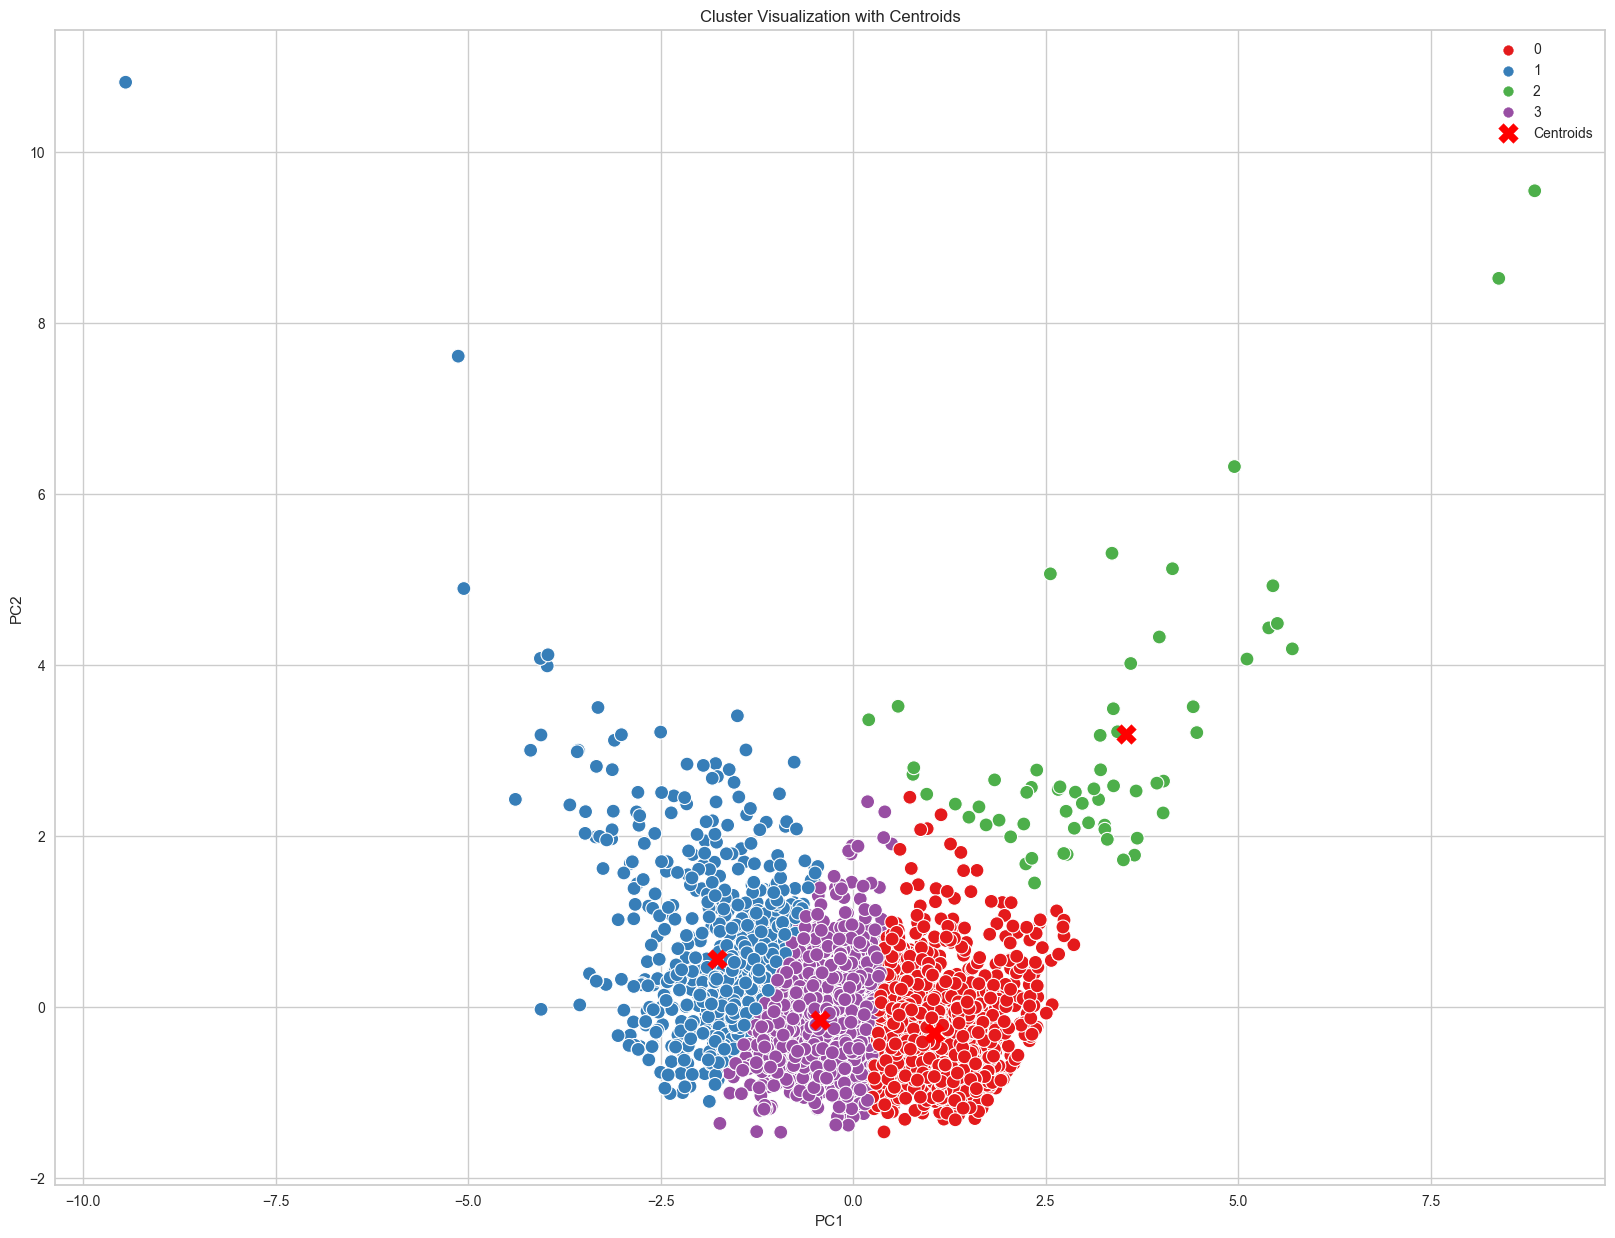

In [71]:
print(df.columns)


# Create a scatter plot of the data points 
sns.scatterplot(data=df, x="pc1", y="pc2", hue=kmeans.labels_, palette="Set1", s=100)

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="red", s=200, label="Centroids")

#  Add a legend and show the plot
plt.legend()
plt.title('Cluster Visualization with Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

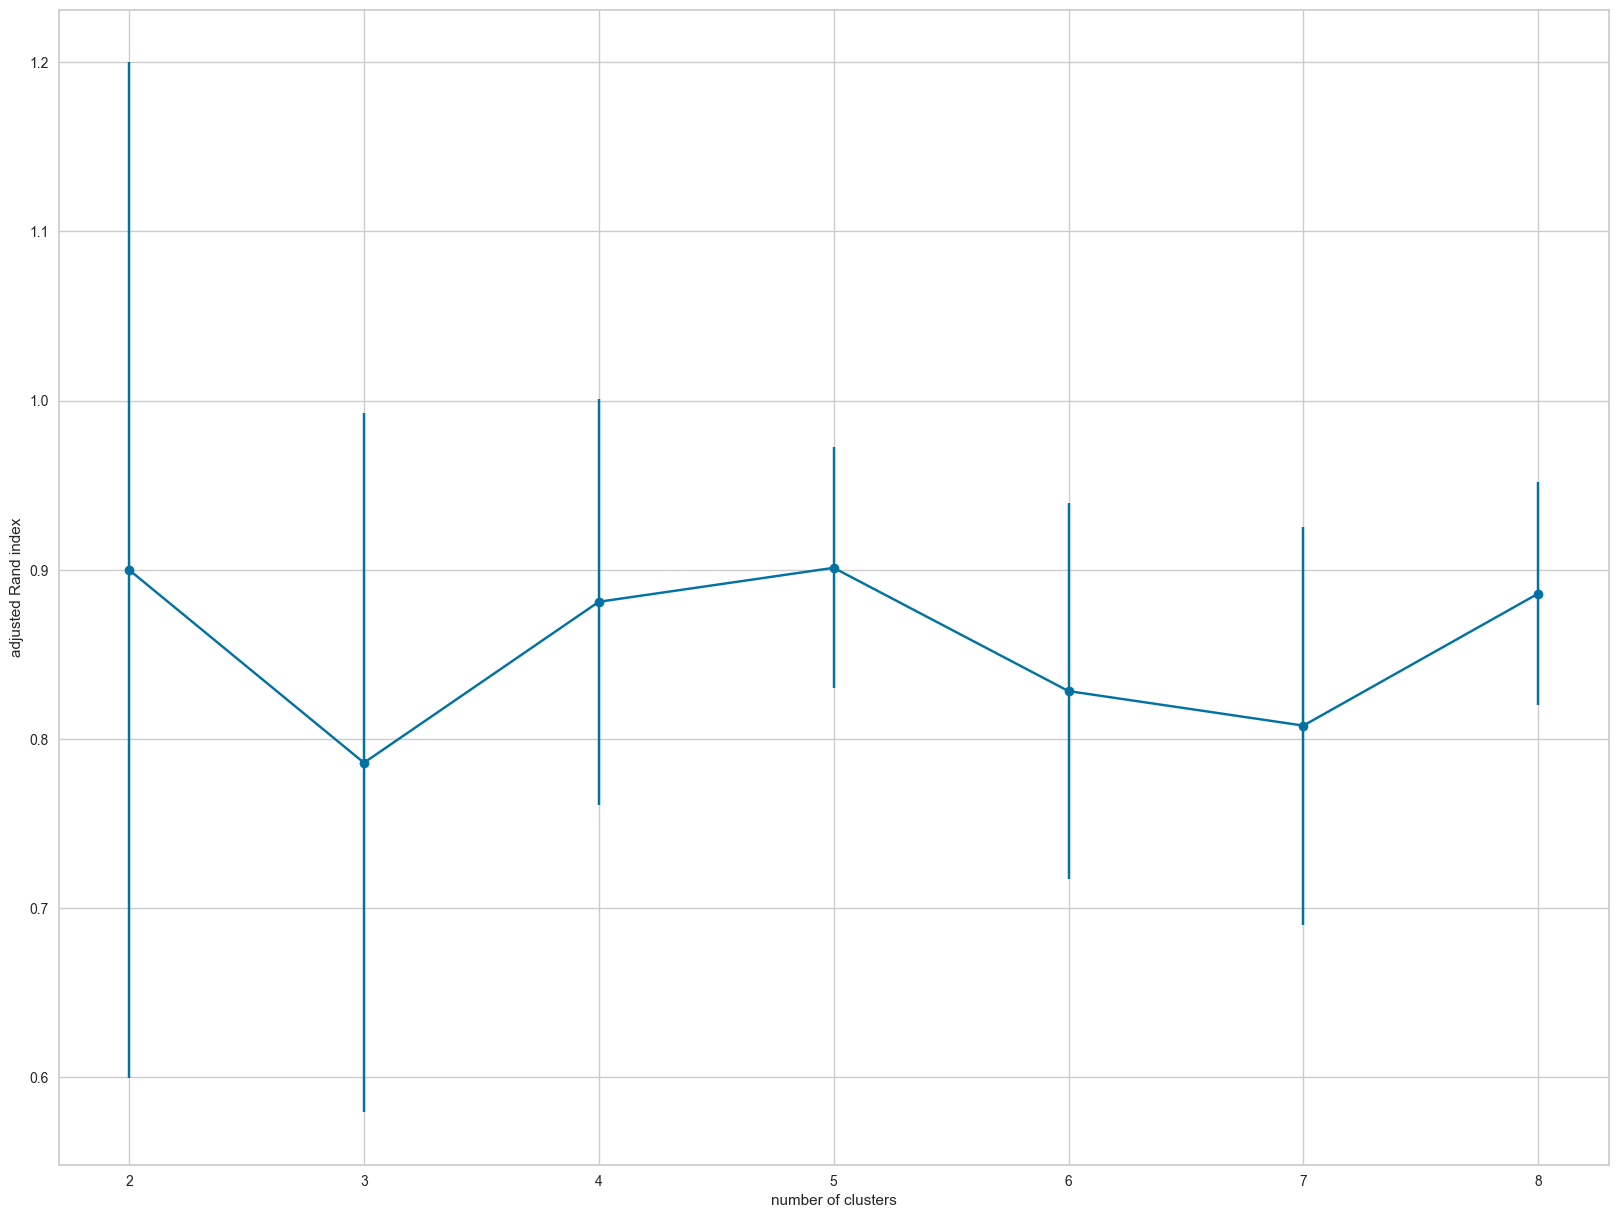

In [73]:
np.random.seed(1234)

# perform K-means clustering 
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(car_x)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(car_x)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [74]:
# Count the frequency of each value in the 'fuel' column
fuel_counts = df["fuel"].value_counts()
# Reverse the order of the resulting Series
fuel_counts = fuel_counts.iloc[::-1]
print(fuel_counts)

# Count the frequency of each value in the 'seller_type' column
seller_type_counts = df["seller_type"].value_counts()
# Reverse the order of the resulting Series
seller_type_counts = seller_type_counts.iloc[::-1]
print(seller_type_counts)

# Count the frequency of each value in the 'transmission' column
transmission_counts = df["transmission"].value_counts()
# Reverse the order of the resulting Series
transmission_counts = transmission_counts.iloc[::-1]
print(transmission_counts)

# Count the frequency of each value in the 'owner' column
owner_counts = df["owner"].value_counts()
# Reverse the order of the resulting Series
owner_counts = owner_counts.iloc[::-1]
print(owner_counts)


2       1
3      23
0      40
4    2123
1    2153
Name: fuel, dtype: int64
2     102
0     994
1    3244
Name: seller_type, dtype: int64
0     448
1    3892
Name: transmission, dtype: int64
3      17
1      81
4     304
2    1106
0    2832
Name: owner, dtype: int64


In [75]:
# Convert 'fuel' to numeric and subtract from 100 to create a new column 'fuel.n'
df["fuel.n"] = 100 - pd.to_numeric(df["fuel"], errors="coerce")
fuel_n_counts = df["fuel.n"].value_counts()
print(fuel_n_counts)

# Convert 'seller_type' to numeric and subtract from 100 to create a new column 'seller_type.n'
df["seller_type.n"] = 100 - pd.to_numeric(df["seller_type"], errors="coerce")
seller_type_n_counts = df["seller_type.n"].value_counts()
print(seller_type_n_counts)

# Convert 'transmission' to numeric and subtract from 100 to create a new column 'transmission.n'
df["transmission.n"] = 100 - pd.to_numeric(df["transmission"], errors="coerce")
transmission_n_counts = df["transmission.n"].value_counts()
print(transmission_n_counts)

# Convert 'owner' to numeric and subtract from 100 to create a new column 'owner.n'
df["owner.n"] = 100 - pd.to_numeric(df["owner"], errors="coerce")
owner_n_counts = df["owner.n"].value_counts()
print(owner_n_counts)


99     2153
96     2123
100      40
97       23
98        1
Name: fuel.n, dtype: int64
99     3244
100     994
98      102
Name: seller_type.n, dtype: int64
99     3892
100     448
Name: transmission.n, dtype: int64
100    2832
98     1106
96      304
99       81
97       17
Name: owner.n, dtype: int64


### 6. Profiling Segments

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [77]:
from scipy.cluster.hierarchy import linkage

# Select numeric columns from the DataFrame  
numeric_columns = df[["year", "selling_price", "km_driven"]]  

# Transpose the DataFrame so that columns are treated as rows
D = np.transpose(numeric_columns)

# Compute pairwise distances using hierarchical clustering (average linkage method)
D_linkage = linkage(D, method="average")

# Print the linkage matrix (pairwise distances)
print(D_linkage)


[[0.00000000e+00 2.00000000e+00 5.22784592e+06 2.00000000e+00]
 [1.00000000e+00 3.00000000e+00 4.94136081e+07 3.00000000e+00]]


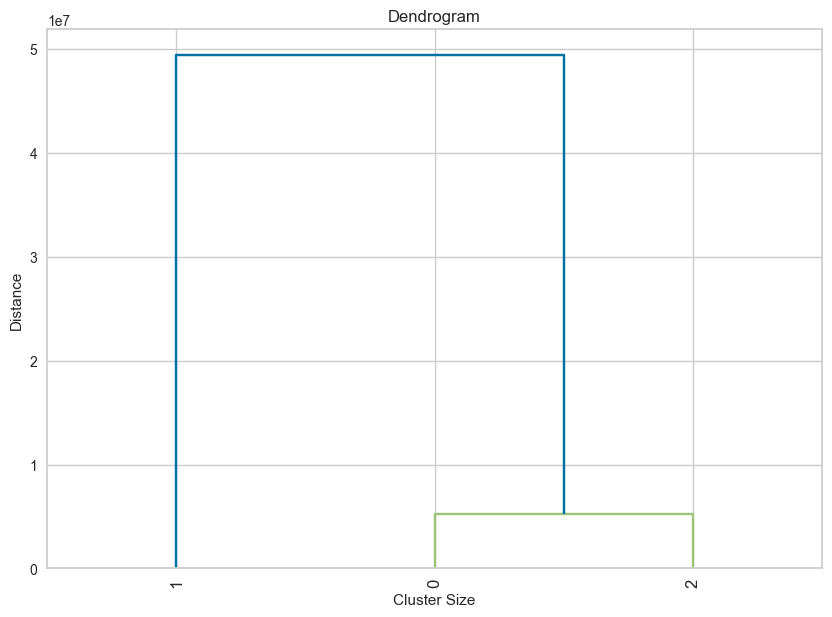

In [78]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Select numeric columns from the DataFrame (example columns)
numeric_columns = df[["year", "selling_price", "km_driven"]]  # Update with your selected columns

# Transpose the DataFrame for clustering
D = np.transpose(numeric_columns)

# Compute the linkage matrix using average linkage method
D_linkage = linkage(D, method="average")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(D_linkage, truncate_mode="lastp", p=12, leaf_rotation=90,
           leaf_font_size=12, show_contracted=True)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [79]:
# Select numeric columns from the DataFrame 
numeric_columns = df[["year", "selling_price", "km_driven"]]  
# Apply PCA
pca = PCA(n_components=2)  # Extract the first two principal components
proj_data = pca.fit_transform(numeric_columns)

# Plot the scatter plot for the first two principal components
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Projection onto First Two Principal Components")
plt.show()


### Describing Segment

In [80]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Create a crosstab for 'cluster_num' and a relevant column 
crosstab = pd.crosstab(df['cluster_num'], df['fuel']) 
print(crosstab)

# Visualize the crosstab using a mosaic plot
mosaic(crosstab.stack())

# Show the plot
plt.show()


fuel          0    1  2   3    4
cluster_num                     
0            14  777  0   1  911
1             4  434  0   8  359
2             0   93  0   0    8
3            22  849  1  14  845


In [81]:
# Create a crosstab for 'cluster_num' and 'fuel' 
crosstab_fuel = pd.crosstab(df['cluster_num'], df['fuel'])  


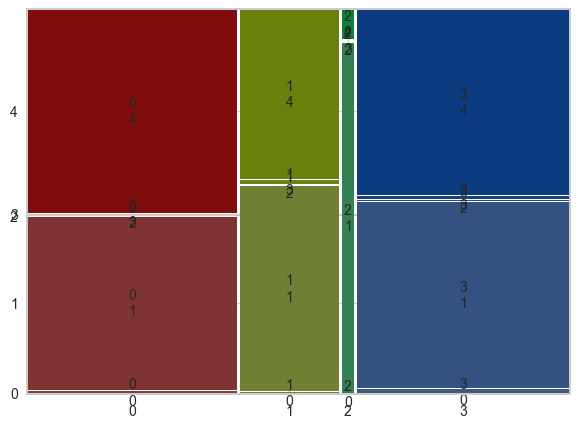

In [82]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a crosstab for 'cluster_num' and 'fuel' 
crosstab_fuel = pd.crosstab(df['cluster_num'], df['fuel'])  

plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab_fuel.stack())
plt.show()


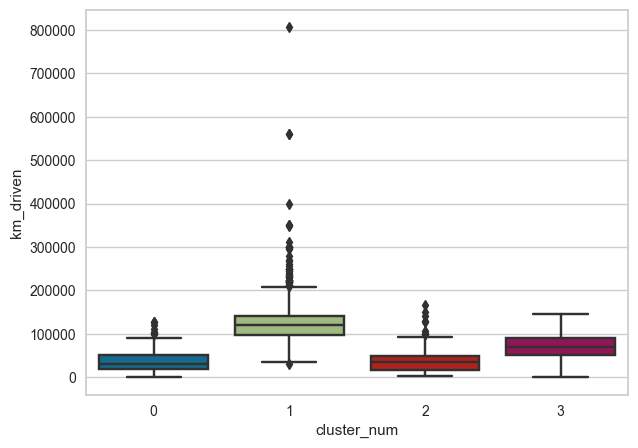

In [83]:
# Box plot for 'km_driven' with respect to 'cluster_num'
sns.boxplot(x="cluster_num", y="km_driven", data=df)
plt.show()



In [84]:
from sklearn.preprocessing import LabelEncoder
# Apply LabelEncoder to the 'fuel' column
df['fuel_encoded'] = LabelEncoder().fit_transform(df['fuel'])

# Group by 'cluster_num' and calculate the mean of the 'fuel_encoded'
fuel_mean = df.groupby('cluster_num')['fuel_encoded'].mean()
# Reset the index and convert to DataFrame
fuel_mean = fuel_mean.to_frame().reset_index()
print(fuel_mean)


   cluster_num  fuel_encoded
0            0      2.597769
1            1      2.352795
2            2      1.237624
3            3      2.468515


In [85]:
# Group by 'cluster_num' and calculate the mean of the 'selling_price' column
selling_price_mean = df.groupby('cluster_num')['selling_price'].mean()
# Reset the index and convert to DataFrame
selling_price_mean = selling_price_mean.to_frame().reset_index()
print(selling_price_mean)


   cluster_num  selling_price
0            0   6.544850e+05
1            1   2.265461e+05
2            2   3.390723e+06
3            3   3.168643e+05


In [86]:
# Group by 'cluster_num' and calculate the mean of the 'km_driven' column
km_driven_mean = df.groupby('cluster_num')['km_driven'].mean()
# Reset the index and convert to DataFrame
km_driven_mean = km_driven_mean.to_frame().reset_index()
print(km_driven_mean)


   cluster_num      km_driven
0            0   34369.492660
1            1  125933.776398
2            2   42123.386139
3            3   71180.864240


In [87]:
# Calculate the mean for 'selling_price', 'km_driven', and 'fuel'
selling_price_mean = df.groupby('cluster_num')['selling_price'].mean().to_frame().reset_index()
km_driven_mean = df.groupby('cluster_num')['km_driven'].mean().to_frame().reset_index()
fuel_mean = df.groupby('cluster_num')['fuel'].mean().to_frame().reset_index()
segment = selling_price_mean.merge(km_driven_mean, on='cluster_num', how='left').merge(fuel_mean, on='cluster_num', how='left')
print(segment)


   cluster_num  selling_price      km_driven      fuel
0            0   6.544850e+05   34369.492660  2.597769
1            1   2.265461e+05  125933.776398  2.352795
2            2   3.390723e+06   42123.386139  1.237624
3            3   3.168643e+05   71180.864240  2.468515


In [88]:
# Scatter plot using 'selling_price' and 'km_driven'
plt.figure(figsize=(10, 5))
sns.scatterplot(x="selling_price", y="km_driven", data=segment, s=400, color="blue")
plt.title("Simple segment evaluation plot for the selling price and km driven data",
          fontsize=16)
plt.xlabel("Selling Price", fontsize=10)
plt.ylabel("KM Driven", fontsize=10)
plt.show()


### 3rd dataset

In [89]:
df3 = pd.read_csv('train.csv')
df3

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0                    45                1441      01-01-84        Salaried   
1                    45                1502      31-07-85   Self employed   
2                    45                1497      24-08-85   Self employed   
3                    45                1501      30-12-93   Self employed   
4                    45                1495      09-12-77   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050      01-08-88        Salaried   
233150               51                 990      05-12-88   Self employed   
233151               86                2299      01-06-76        Salaried   
233152               86                2299      26-03-94        Salaried   
233153               86                2299      18-02-84        Salaried   

        ... SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0       ...                     0                     0                   0   
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

        SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   
...                ...                           ...   
233149               0                             0   
233150               0                             0   
233151               0                             0   
233152               0                             0   
233153               0                             0   

        DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                         0         0yrs 0mon   
1                                         1        1yrs 11mon   
2                                         0         0yrs 0mon   
3                                         0         0yrs 8mon   
4                                         0         0yrs 0mon   
...                                     ...               ...   
233149                           

In [90]:
df3.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [91]:
df3.describe()

UniqueID  disbursed_amount    asset_cost            ltv  \
count  233154.000000     233154.000000  2.331540e+05  233154.000000   
mean   535917.573376      54356.993528  7.586507e+04      74.746530   
std     68315.693711      12971.314171  1.894478e+04      11.456636   
min    417428.000000      13320.000000  3.700000e+04      10.030000   
25%    476786.250000      47145.000000  6.571700e+04      68.880000   
50%    535978.500000      53803.000000  7.094600e+04      76.800000   
75%    595039.750000      60413.000000  7.920175e+04      83.670000   
max    671084.000000     990572.000000  1.628992e+06      95.000000   

           branch_id    supplier_id  manufacturer_id  Current_pincode_ID  \
count  233154.000000  233154.000000    233154.000000       233154.000000   
mean       72.936094   19638.635035        69.028054         3396.880247   
std        69.834995    3491.949566        22.141304         2238.147502   
min         1.000000   10524.000000        45.000000            1.000000   
25%        14.000000   16535.000000        48.000000         1511.000000   
50%        61.000000   20333.000000        86.000000         2970.000000   
75%       130.000000   23000.000000        86.000000         5677.000000   
max       261.000000   24803.000000       156.000000         7345.000000   

            State_ID  Employee_code_ID  ...  SEC.OVERDUE.ACCTS  \
count  233154.000000     233154.000000  ...      233154.000000   
mean        7.262243       1549.477148  ...           0.007244   
std         4.482230        975.261278  ...           0.111079   
min         1.000000          1.000000  ...           0.000000   
25%         4.000000        713.000000  ...           0.000000   
50%         6.000000       1451.000000  ...           0.000000   
75%        10.000000       2362.000000  ...           0.000000   
max        22.000000       3795.000000  ...           8.000000   

       SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
count         2.331540e+05           2.331540e+05          2.331540e+05   
mean          5.427793e+03           7.295923e+03          7.179998e+03   
std           1.702370e+05           1.831560e+05          1.825925e+05   
min          -5.746470e+05           0.000000e+00          0.000000e+00   
25%           0.000000e+00           0.000000e+00          0.000000e+00   
50%           0.000000e+00           0.000000e+00          0.000000e+00   
75%           0.000000e+00           0.000000e+00          0.000000e+00   
max           3.603285e+07           3.000000e+07          3.000000e+07   

       PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
count        2.331540e+05    2.331540e+05                 233154.000000   
mean         1.310548e+04    3.232684e+02                      0.381833   
std          1.513679e+05    1.555369e+04                      0.955107   
min          0.000000e+00    0.000000e+00                      0.000000   
25%          0.000000e+00    0.000000e+00                      0.000000   
50%          0.000000e+00    0.000000e+00                      0.000000   
75%          1.999000e+03    0.000000e+00                      0.000000   
max          2.564281e+07    4.170901e+06                     35.000000   

       DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  NO.OF_INQUIRIES   loan_default  
count                        233154.000000    233154.000000  233154.000000  
mean                              0.097481         0.206615       0.217071  
std                               0.384439         0.706498       0.412252  
min                               0.000000         0.000000       0.000000  
25%                               0.000000         0.000000       0.000000  
50%                               0.000000         0.000000       0.000000  
75%                               0.000000         0.000000       0.000000  
max                              20.000000        36.000000       1.000000  

[8 rows x 35 columns]

In [92]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [93]:
df3.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [94]:
df3.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [95]:
# list of columns to drop
columns_to_drop = [
    col for col in df3.columns if col not in [
        'disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type', 
        'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.CURRENT.BALANCE', 
        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 
        'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'loan_default'
    ]
]

# Drop the unwanted columns
df3.drop(columns=columns_to_drop, inplace=True)


In [96]:
df3

disbursed_amount  asset_cost    ltv Employment.Type  \
0                  50578       58400  89.55        Salaried   
1                  47145       65550  73.23   Self employed   
2                  53278       61360  89.63   Self employed   
3                  57513       66113  88.48   Self employed   
4                  52378       60300  88.39   Self employed   
...                  ...         ...    ...             ...   
233149             63213      105405  60.72        Salaried   
233150             73651      100600  74.95   Self employed   
233151             33484       71212  48.45        Salaried   
233152             34259       73286  49.10        Salaried   
233153             75751      116009  66.81        Salaried   

        PERFORM_CNS.SCORE  PRI.NO.OF.ACCTS  PRI.CURRENT.BALANCE  \
0                       0                0                    0   
1                     598                1                27600   
2                       0                0                    0   
3                     305                3                    0   
4                       0                0                    0   
...                   ...              ...                  ...   
233149                735                4               390443   
233150                825                1                    0   
233151                  0                0                    0   
233152                  0                0                    0   
233153                  0                0                    0   

        NEW.ACCTS.IN.LAST.SIX.MONTHS  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
0                                  0                                    0   
1                                  0                                    1   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   
...                              ...                                  ...   
233149                             0                                    0   
233150                             0                                    0   
233151                             0                                    0   
233152                             0                                    0   
233153                             0                                    0   

       AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  loan_default  
0             0yrs 0mon             0yrs 0mon             0  
1            1yrs 11mon            1yrs 11mon             1  
2             0yrs 0mon             0yrs 0mon             0  
3             0yrs 8mon             1yrs 3mon             1  
4             0yrs 0mon             0yrs 0mon             1  
...                 ...                   ...           ...  
233149        1yrs 9mon             3yrs 3mon             0  
233150        0yrs 6mon             0yrs 6mon             0  
233151        0yrs 0mon             0yrs 0mon             0  
233152        0yrs 0mon             0yrs 0mon             0  
233153        0yrs 0mon             0yrs 0mon             0  

[233154 rows x 12 columns]

In [97]:
# Checking for the count of specific variables in df3
df3['Employment.Type'].value_counts()
df3['PERFORM_CNS.SCORE'].value_counts()
df3['loan_default'].value_counts()


0    182543
1     50611
Name: loan_default, dtype: int64

In [98]:
train_x = (df3.iloc[:, :11] == "Yes").astype(int)
col_means = np.round(train_x.mean(), 2)
print(col_means)


disbursed_amount                       0.0
asset_cost                             0.0
ltv                                    0.0
Employment.Type                        0.0
PERFORM_CNS.SCORE                      0.0
PRI.NO.OF.ACCTS                        0.0
PRI.CURRENT.BALANCE                    0.0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.0
AVERAGE.ACCT.AGE                       0.0
CREDIT.HISTORY.LENGTH                  0.0
dtype: float64


In [99]:
# Considering only the first 11 attributes
train_x = df3.iloc[:, :11]
train_x


disbursed_amount  asset_cost    ltv Employment.Type  \
0                  50578       58400  89.55        Salaried   
1                  47145       65550  73.23   Self employed   
2                  53278       61360  89.63   Self employed   
3                  57513       66113  88.48   Self employed   
4                  52378       60300  88.39   Self employed   
...                  ...         ...    ...             ...   
233149             63213      105405  60.72        Salaried   
233150             73651      100600  74.95   Self employed   
233151             33484       71212  48.45        Salaried   
233152             34259       73286  49.10        Salaried   
233153             75751      116009  66.81        Salaried   

        PERFORM_CNS.SCORE  PRI.NO.OF.ACCTS  PRI.CURRENT.BALANCE  \
0                       0                0                    0   
1                     598                1                27600   
2                       0                0                    0   
3                     305                3                    0   
4                       0                0                    0   
...                   ...              ...                  ...   
233149                735                4               390443   
233150                825                1                    0   
233151                  0                0                    0   
233152                  0                0                    0   
233153                  0                0                    0   

        NEW.ACCTS.IN.LAST.SIX.MONTHS  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
0                                  0                                    0   
1                                  0                                    1   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   
...                              ...                                  ...   
233149                             0                                    0   
233150                             0                                    0   
233151                             0                                    0   
233152                             0                                    0   
233153                             0                                    0   

       AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  
0             0yrs 0mon             0yrs 0mon  
1            1yrs 11mon            1yrs 11mon  
2             0yrs 0mon             0yrs 0mon  
3             0yrs 8mon             1yrs 3mon  
4             0yrs 0mon             0yrs 0mon  
...                 ...                   ...  
233149        1yrs 9mon             3yrs 3mon  
233150        0yrs 6mon             0yrs 6mon  
233151        0yrs 0mon             0yrs 0mon  
233152        0yrs 0mon             0yrs 0mon  
233153        0yrs 0mon             0yrs 0mon  

[233154 rows x 11 columns]

### 4. Exploring data

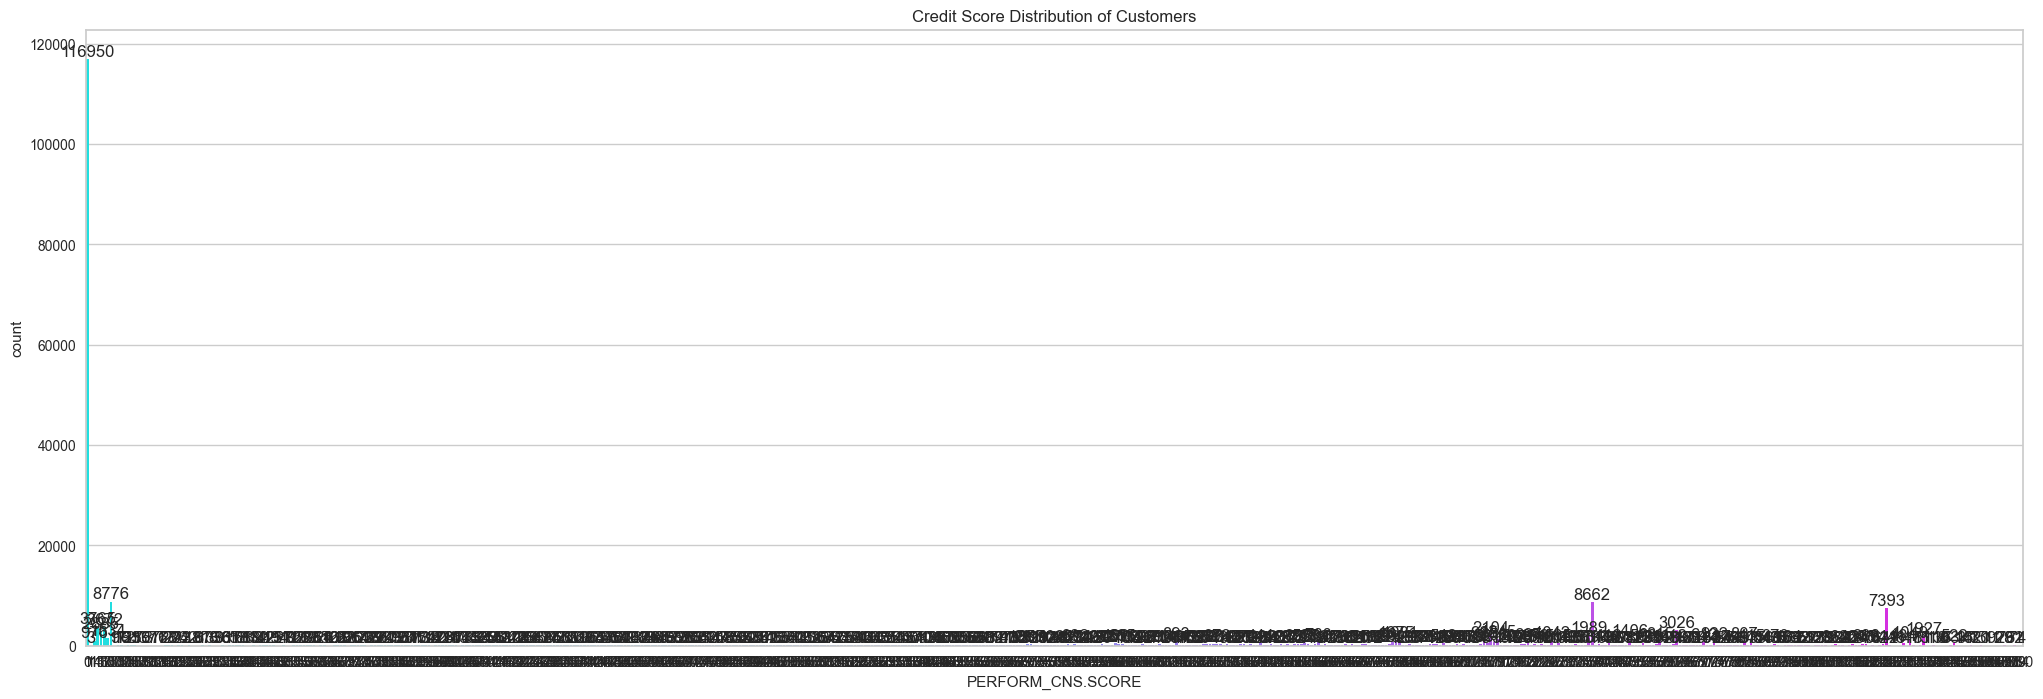

In [100]:
# Customer segmentation - based on Employment Type and Credit Score

# Employment Type: Infer the distribution of salaried vs. self-employed customers
labels = df3['Employment.Type'].value_counts().index.tolist()
size = df3['Employment.Type'].value_counts()
colors = ['blue', 'green']
explode = [0.1, 0] 
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Employment Type Distribution', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# Credit Score: Distribution of customers based on CNS score categories
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df3['PERFORM_CNS.SCORE'], palette='cool')
f.bar_label(f.containers[0])
plt.title('Credit Score Distribution of Customers')
plt.show()



In [101]:
from sklearn.preprocessing import LabelEncoder

# Define a function for label encoding
def labelling(x):
    df3[x] = LabelEncoder().fit_transform(df3[x])
    return df3

# List of categorical columns in your dataset (modify based on actual categorical columns in your dataset)
cat_columns = ['Employment.Type', 'PERFORM_CNS.SCORE']  # Add more categorical columns if needed

# Apply label encoding to each categorical column in the list
for col in cat_columns:
    labelling(col)

# Display the dataframe with encoded columns
print(df3.head())


   disbursed_amount  asset_cost    ltv  Employment.Type  PERFORM_CNS.SCORE  \
0             50578       58400  89.55                0                  0   
1             47145       65550  73.23                1                305   
2             53278       61360  89.63                1                  0   
3             57513       66113  88.48                1                 12   
4             52378       60300  88.39                1                  0   

   PRI.NO.OF.ACCTS  PRI.CURRENT.BALANCE  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                0                    0                             0   
1                1                27600                             0   
2                0                    0                             0   
3                3                    0                             0   
4                0                    0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  \
0          

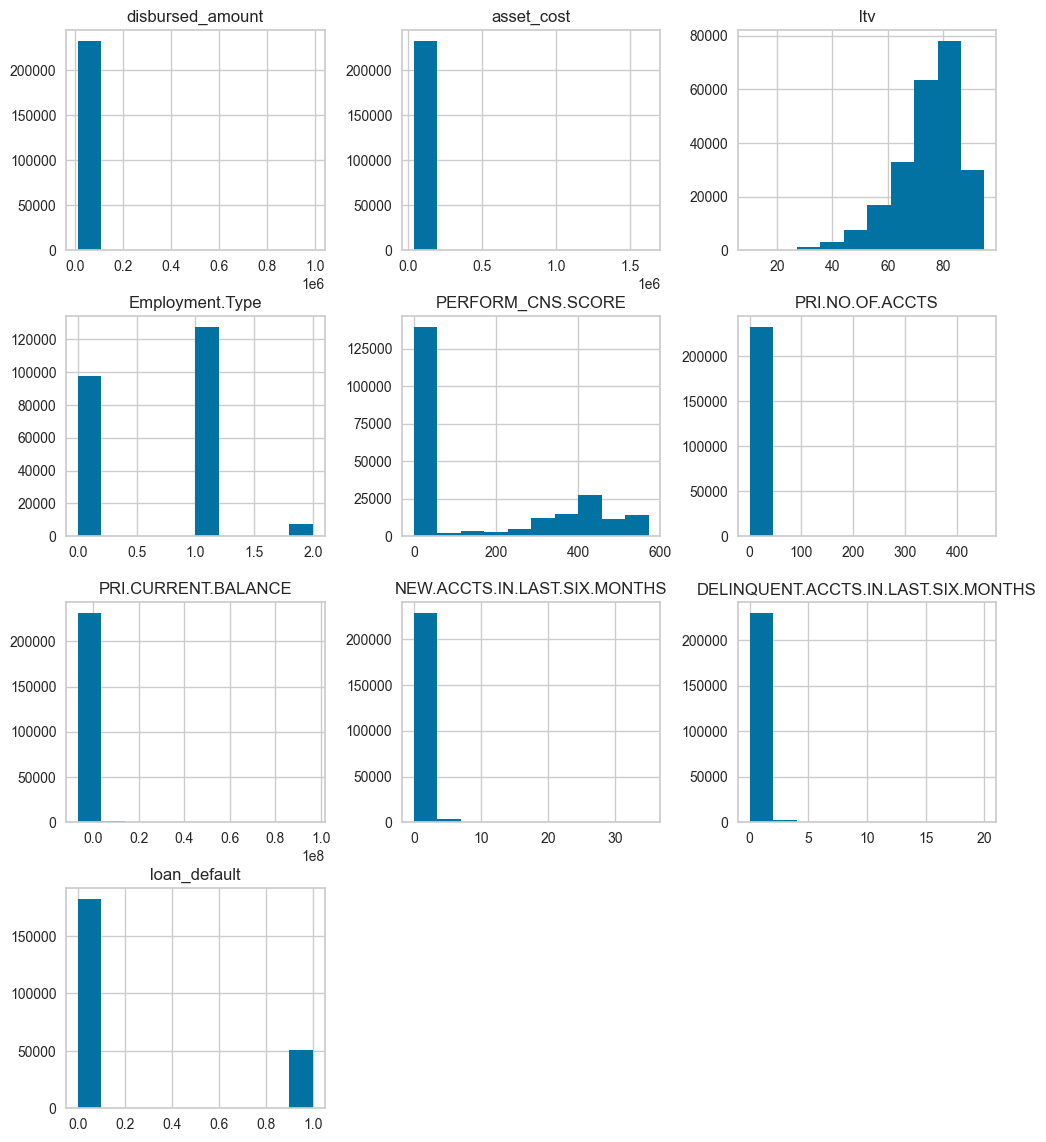

In [102]:
# Set figure size for the histograms
plt.rcParams['figure.figsize'] = (12, 14)

# Plotting histograms for all numeric columns in your dataset
df3.hist()
plt.show()


In [103]:
#  df3 is your dataset and you're selecting specific columns 
train_csv = df3.iloc[:, :11]  

# Display the selected columns
print(train_csv.head())


   disbursed_amount  asset_cost    ltv  Employment.Type  PERFORM_CNS.SCORE  \
0             50578       58400  89.55                0                  0   
1             47145       65550  73.23                1                305   
2             53278       61360  89.63                1                  0   
3             57513       66113  88.48                1                 12   
4             52378       60300  88.39                1                  0   

   PRI.NO.OF.ACCTS  PRI.CURRENT.BALANCE  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                0                    0                             0   
1                1                27600                             0   
2                0                    0                             0   
3                3                    0                             0   
4                0                    0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  
0           

In [104]:
train_csv = df3[['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type', 
                 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.CURRENT.BALANCE', 
                 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 
                 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']]

# Display the selected columns
print(train_csv.head())


   disbursed_amount  asset_cost    ltv  Employment.Type  PERFORM_CNS.SCORE  \
0             50578       58400  89.55                0                  0   
1             47145       65550  73.23                1                305   
2             53278       61360  89.63                1                  0   
3             57513       66113  88.48                1                 12   
4             52378       60300  88.39                1                  0   

   PRI.NO.OF.ACCTS  PRI.CURRENT.BALANCE  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                0                    0                             0   
1                1                27600                             0   
2                0                    0                             0   
3                3                    0                             0   
4                0                    0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  
0           

In [105]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Function to convert '0yrs 0mon' format into a numeric value (e.g., 0)
def convert_age_format(age_str):
    if isinstance(age_str, str):
        # Extract numeric values for years and months
        years, months = 0, 0
        if 'yrs' in age_str and 'mon' in age_str:
            age_parts = age_str.split()
            years = int(age_parts[0].replace('yrs', '').strip())
            months = int(age_parts[1].replace('mon', '').strip())
        return years + months / 12  # Converting months to years
    return age_str

# Apply the conversion to the  'AVERAGE.ACCT.AGE'
df3['AVERAGE.ACCT.AGE'] = df3['AVERAGE.ACCT.AGE'].apply(convert_age_format)

# select only numeric columns
train_csv = df3.select_dtypes(include=['number'])

# Scaling the data
x_scaled = preprocessing.scale(train_csv)

# Performing PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)

# Creating a DataFrame to hold the principal components
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pf = pd.DataFrame(data=pc, columns=names)

# Displaying the DataFrame with the principal components
print(pf.head())


        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.793914 -0.821363  1.612883  0.071219 -0.739949 -0.877403 -0.493265   
1  0.867130 -0.548081  0.076844 -0.989498  2.616443  0.056883  0.741084   
2 -0.878909 -0.435588  0.990841 -0.506131 -0.271027  0.286050 -1.438258   
3 -0.486750  0.197520  1.539674 -1.158985  1.170965  0.937022  0.127228   
4 -0.992092 -0.283273  1.634955 -1.409979  0.980181  0.906589  0.126730   

        pc8       pc9      pc10      pc11  
0 -0.052029 -0.199790  0.012599 -0.178058  
1 -1.213645  0.947774 -0.248777  0.047074  
2 -0.156449 -0.082442 -0.006295 -0.143727  
3  0.278036 -0.481121  0.284034 -0.042385  
4  0.322713 -0.029954  0.038169 -0.101784  


In [109]:
# Select only numeric columns for PCA
train_csv = df3.select_dtypes(include=['number'])

# Scaling the data
x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)



In [110]:
# Print summary statistics for the PCA
print("Standard deviation of each principal component:")
print(np.sqrt(pca.explained_variance_))  
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)

print("\nCumulative proportion of variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_))


Standard deviation of each principal component:
[1.51158948 1.33060172 1.13630885 1.05821225 1.00892071 0.97233341
 0.94285717 0.86548863 0.71330829 0.63993985 0.11788693]

Proportion of variance explained by each principal component:
[0.20771754 0.16095394 0.11738111 0.10180076 0.09253788 0.08594802
 0.08081598 0.06809703 0.04625514 0.0372292  0.00126339]

Cumulative proportion of variance explained by each principal component:
[0.20771754 0.36867148 0.4860526  0.58785336 0.68039123 0.76633925
 0.84715523 0.91525227 0.96150741 0.99873661 1.        ]


In [111]:
x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)
loadings = pca.components_

# Number of columns
num_pc = train_csv.shape[1]  
# Create a list of principal component 
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Create a DataFrame
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)

# Add the names to the DataFrame 
loadings_df['variable'] = train_c0sv.columns.values

# Set the 'variable' column as the index
loadings_df = loadings_df.set_index('variable')

# Display the loadings DataFrame
print(loadings_df)


NameError: name 'train_c0sv' is not defined

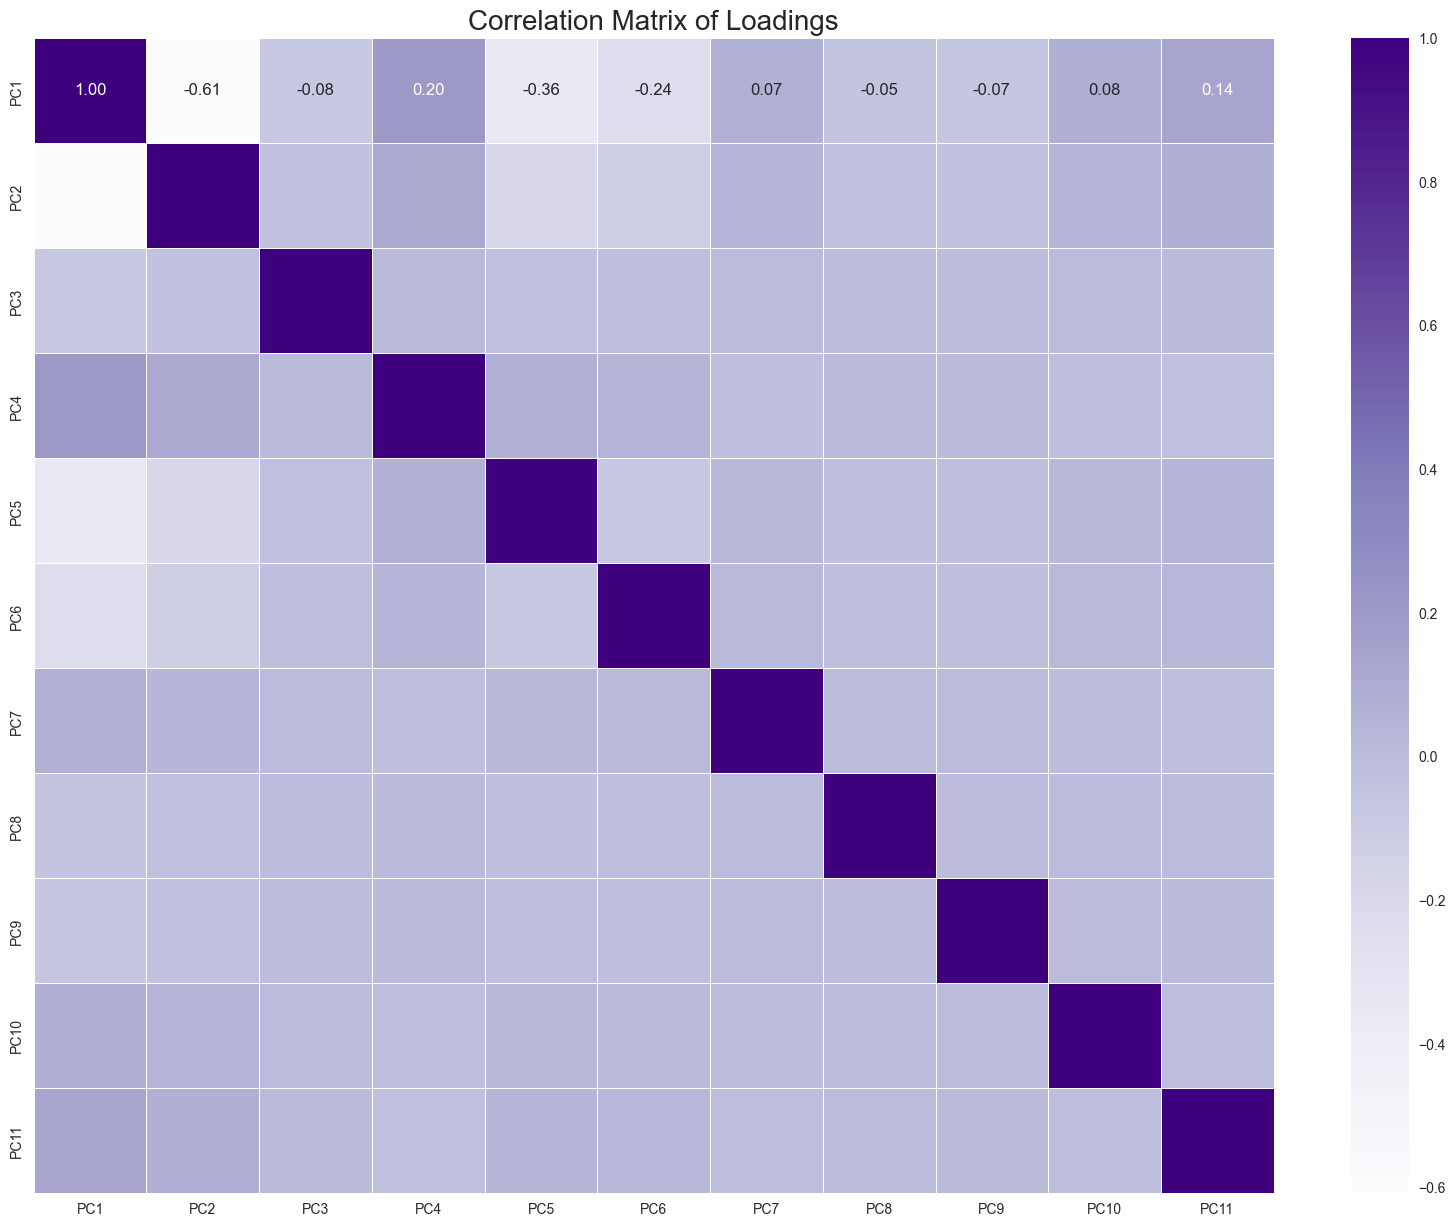

In [112]:
x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)
loadings = pca.components_

# Number of columns
num_pc = train_csv.shape[1]  
# Create a list of principal component names 
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)

# Add names to the DataFrame 
loadings_df['variable'] = train_csv.columns.values

# Set the 'variable' column as the index
loadings_df = loadings_df.set_index('variable')

# Plot the correlation matrix heatmap for the loadings
plt.rcParams['figure.figsize'] = (20, 15)  # Adjust the size of the heatmap
ax = sns.heatmap(loadings_df.corr(), annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Loadings', fontsize=20)
plt.show()


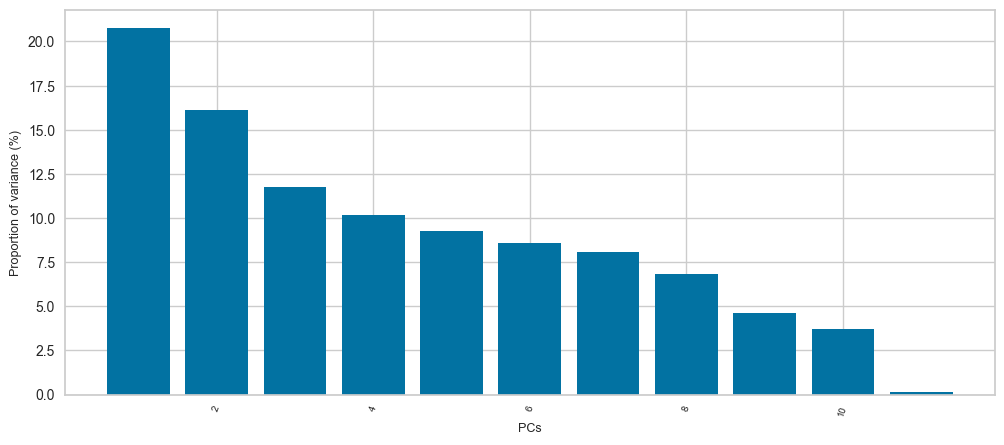

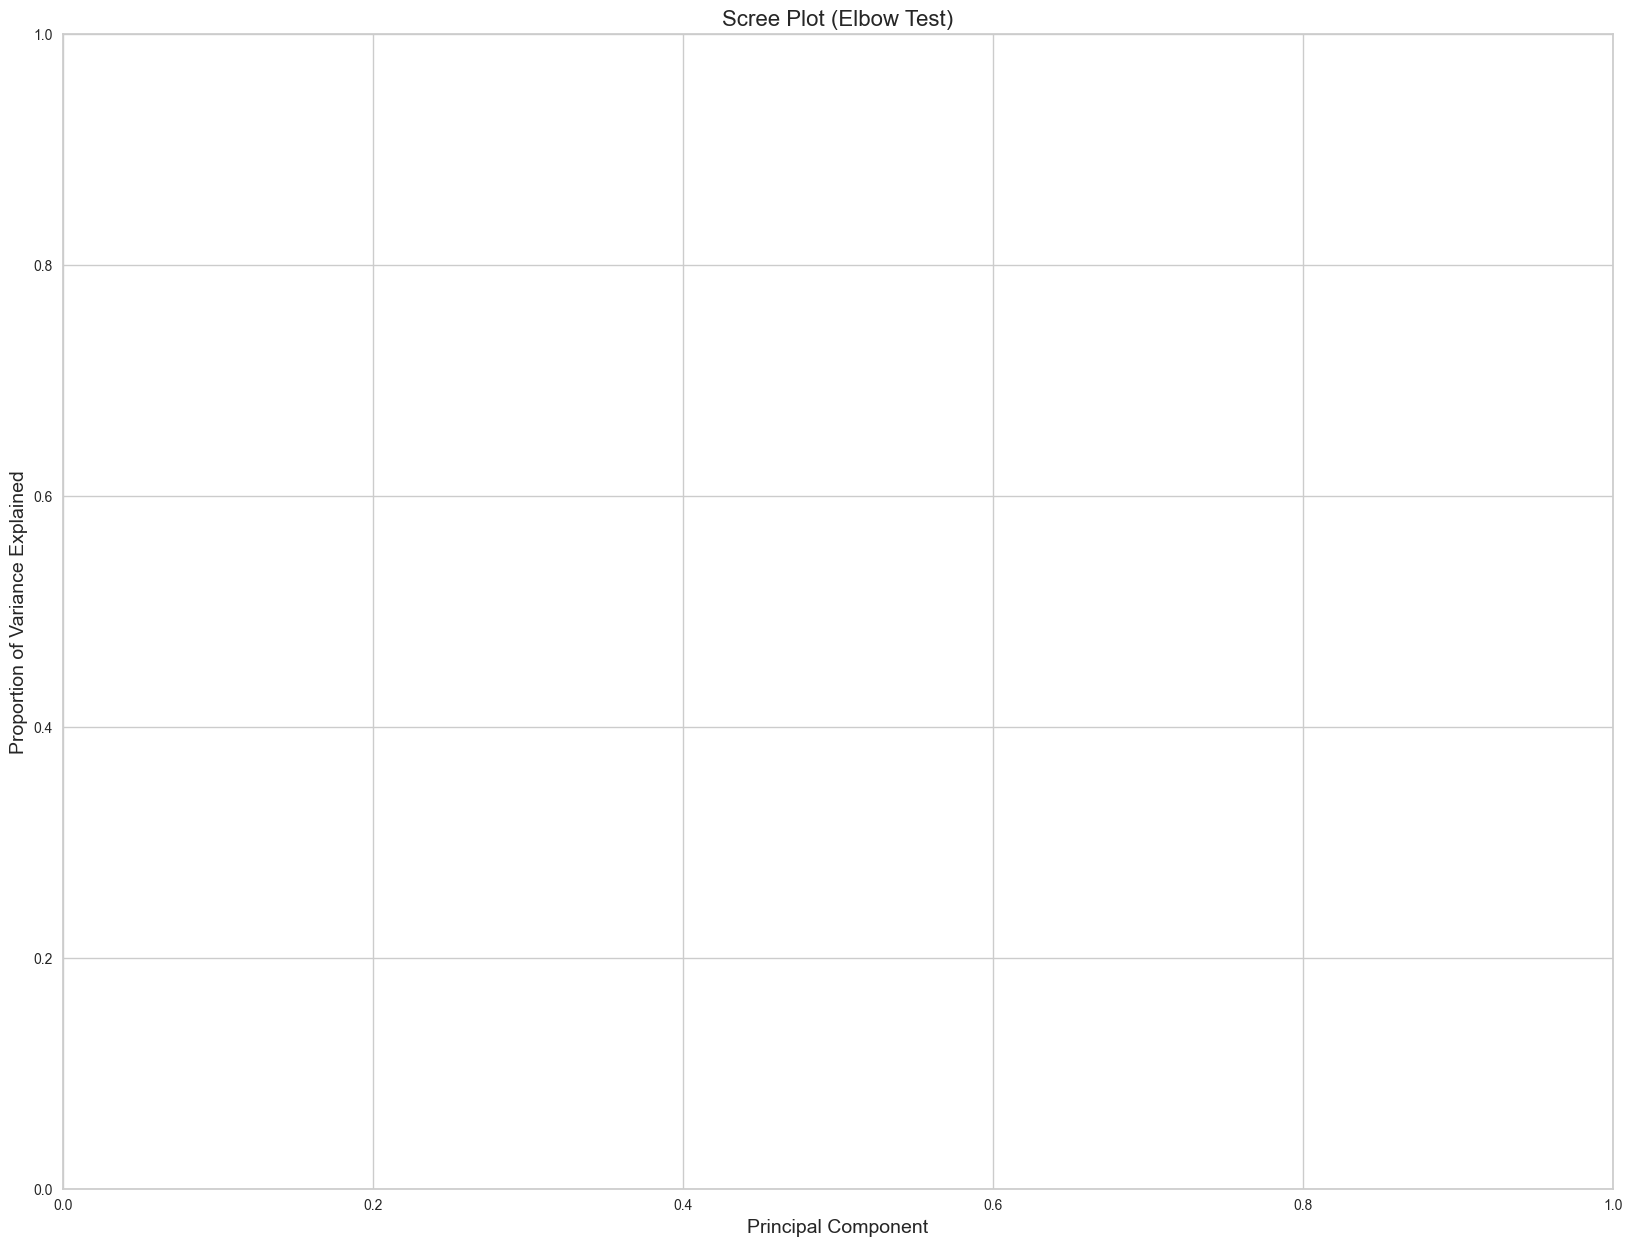

In [113]:
from bioinfokit.visuz import cluster

x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)

# Extract the explained variance ratio 
explained_variance_ratio = pca.explained_variance_ratio_

# Generate a Scree plot 
cluster.screeplot(obj=[list(range(1, len(explained_variance_ratio) + 1)), explained_variance_ratio],
                  show=True, dim=(12, 5))

plt.title("Scree Plot (Elbow Test)", fontsize=16)
plt.xlabel("Principal Component", fontsize=14)
plt.ylabel("Proportion of Variance Explained", fontsize=14)
plt.show()


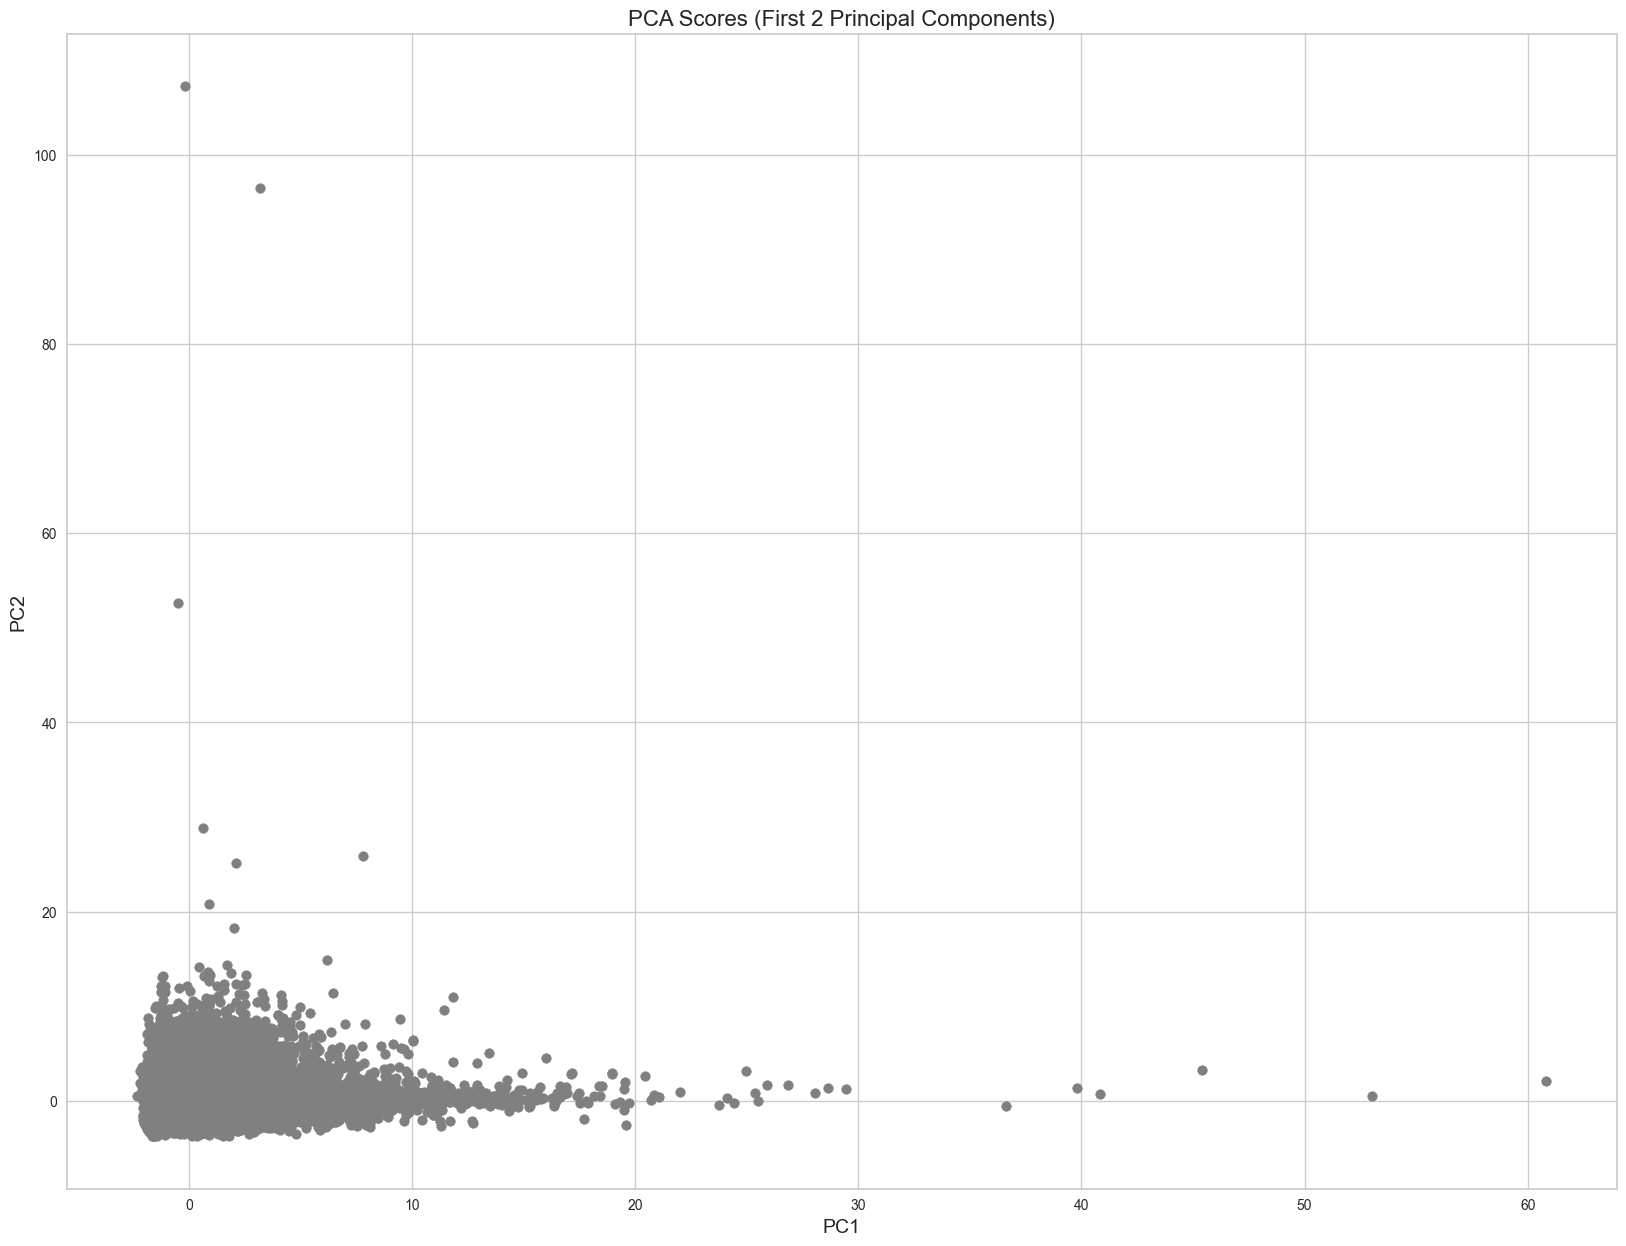

In [114]:
x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)

# Plot the PCA scores
plt.scatter(pc[:, 0], pc[:, 1], color="grey")

# Adding labels and title
plt.title("PCA Scores (First 2 Principal Components)", fontsize=16)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)

# Show the plot
plt.show()


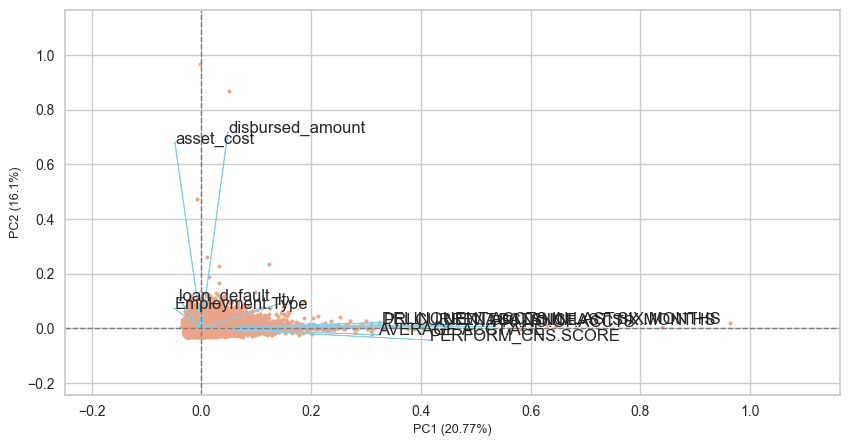

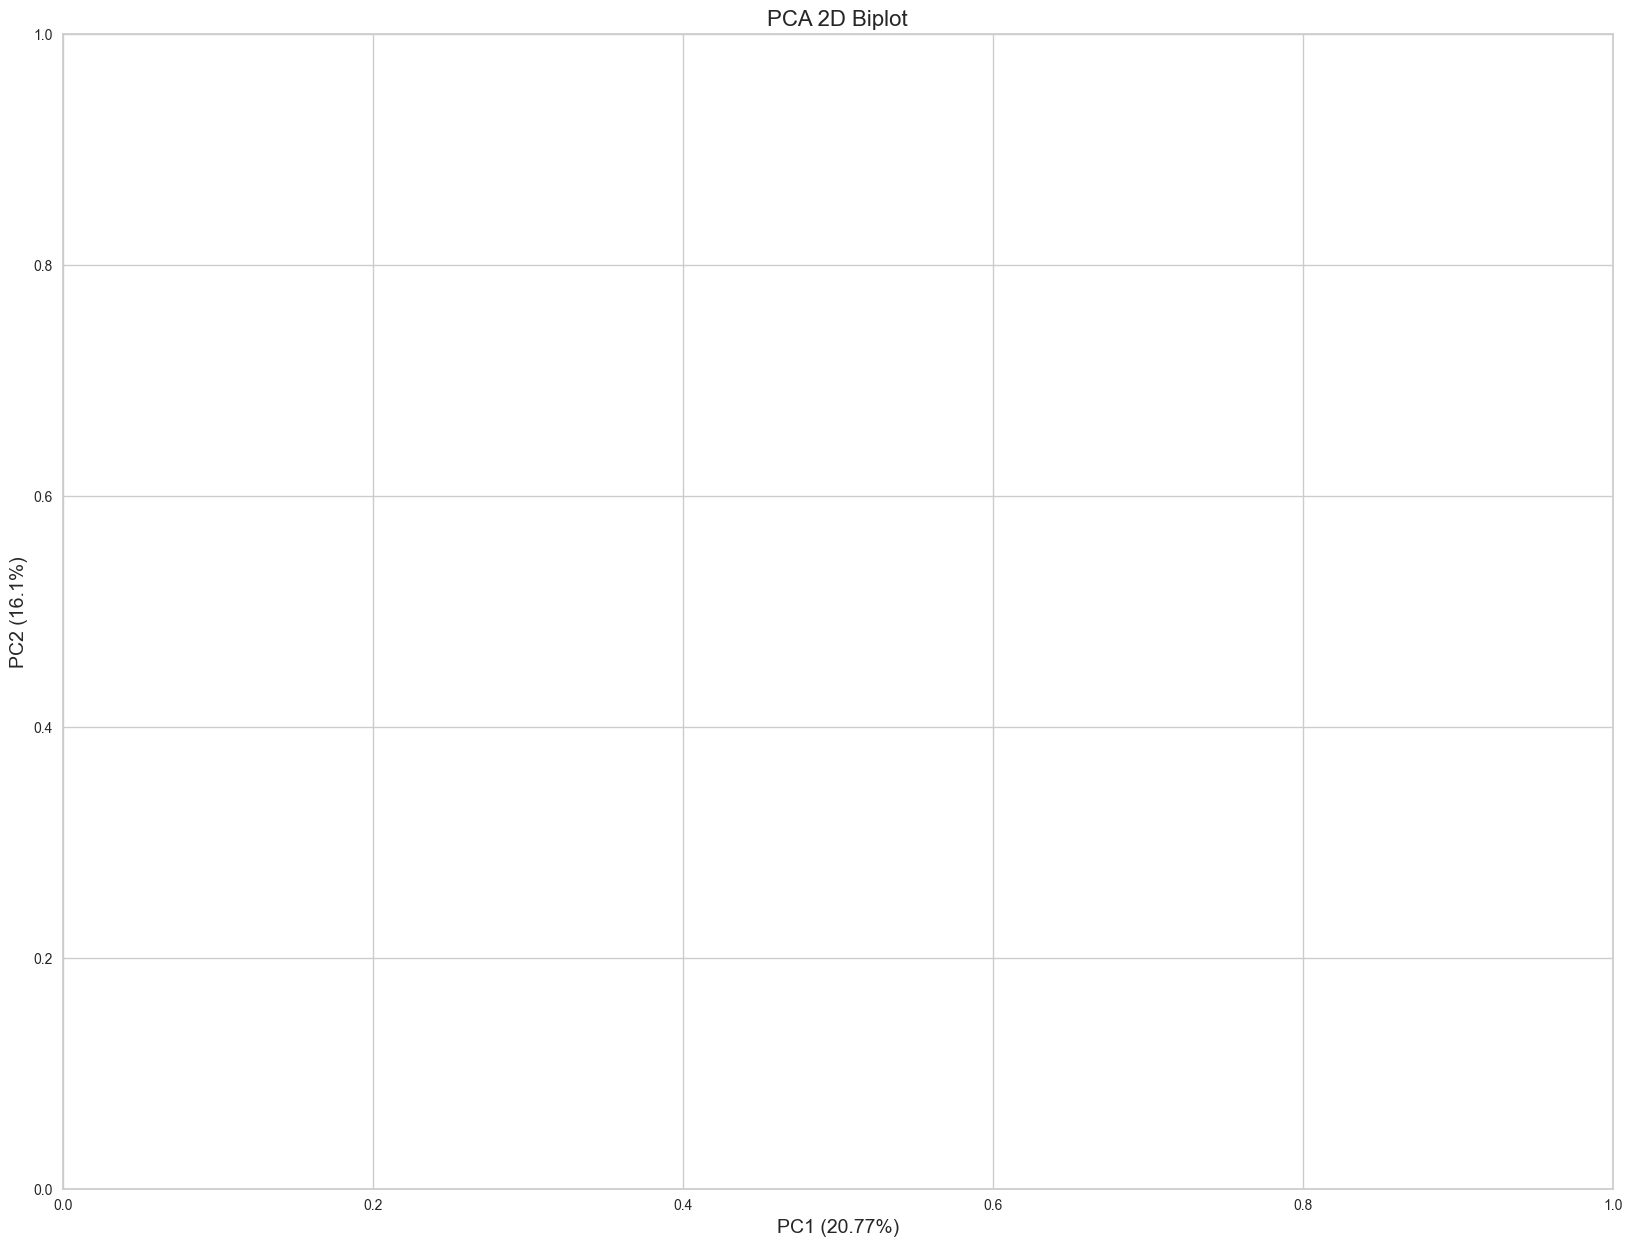

In [115]:
x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 11 components
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)

# Get the coefficients for each principal component
loadings = pca.components_

# Generate PCA scores 
pca_scores = pca.fit_transform(x_scaled)

# Create a biplot using bioinfokit
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=train_csv.columns.values,
               var1=round(pca.explained_variance_ratio_[0] * 100, 2),
               var2=round(pca.explained_variance_ratio_[1] * 100, 2),
               show=True, dim=(10, 5))

plt.title("PCA 2D Biplot", fontsize=16)
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)", fontsize=14)
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)", fontsize=14)
plt.show()


### Extracting Segments

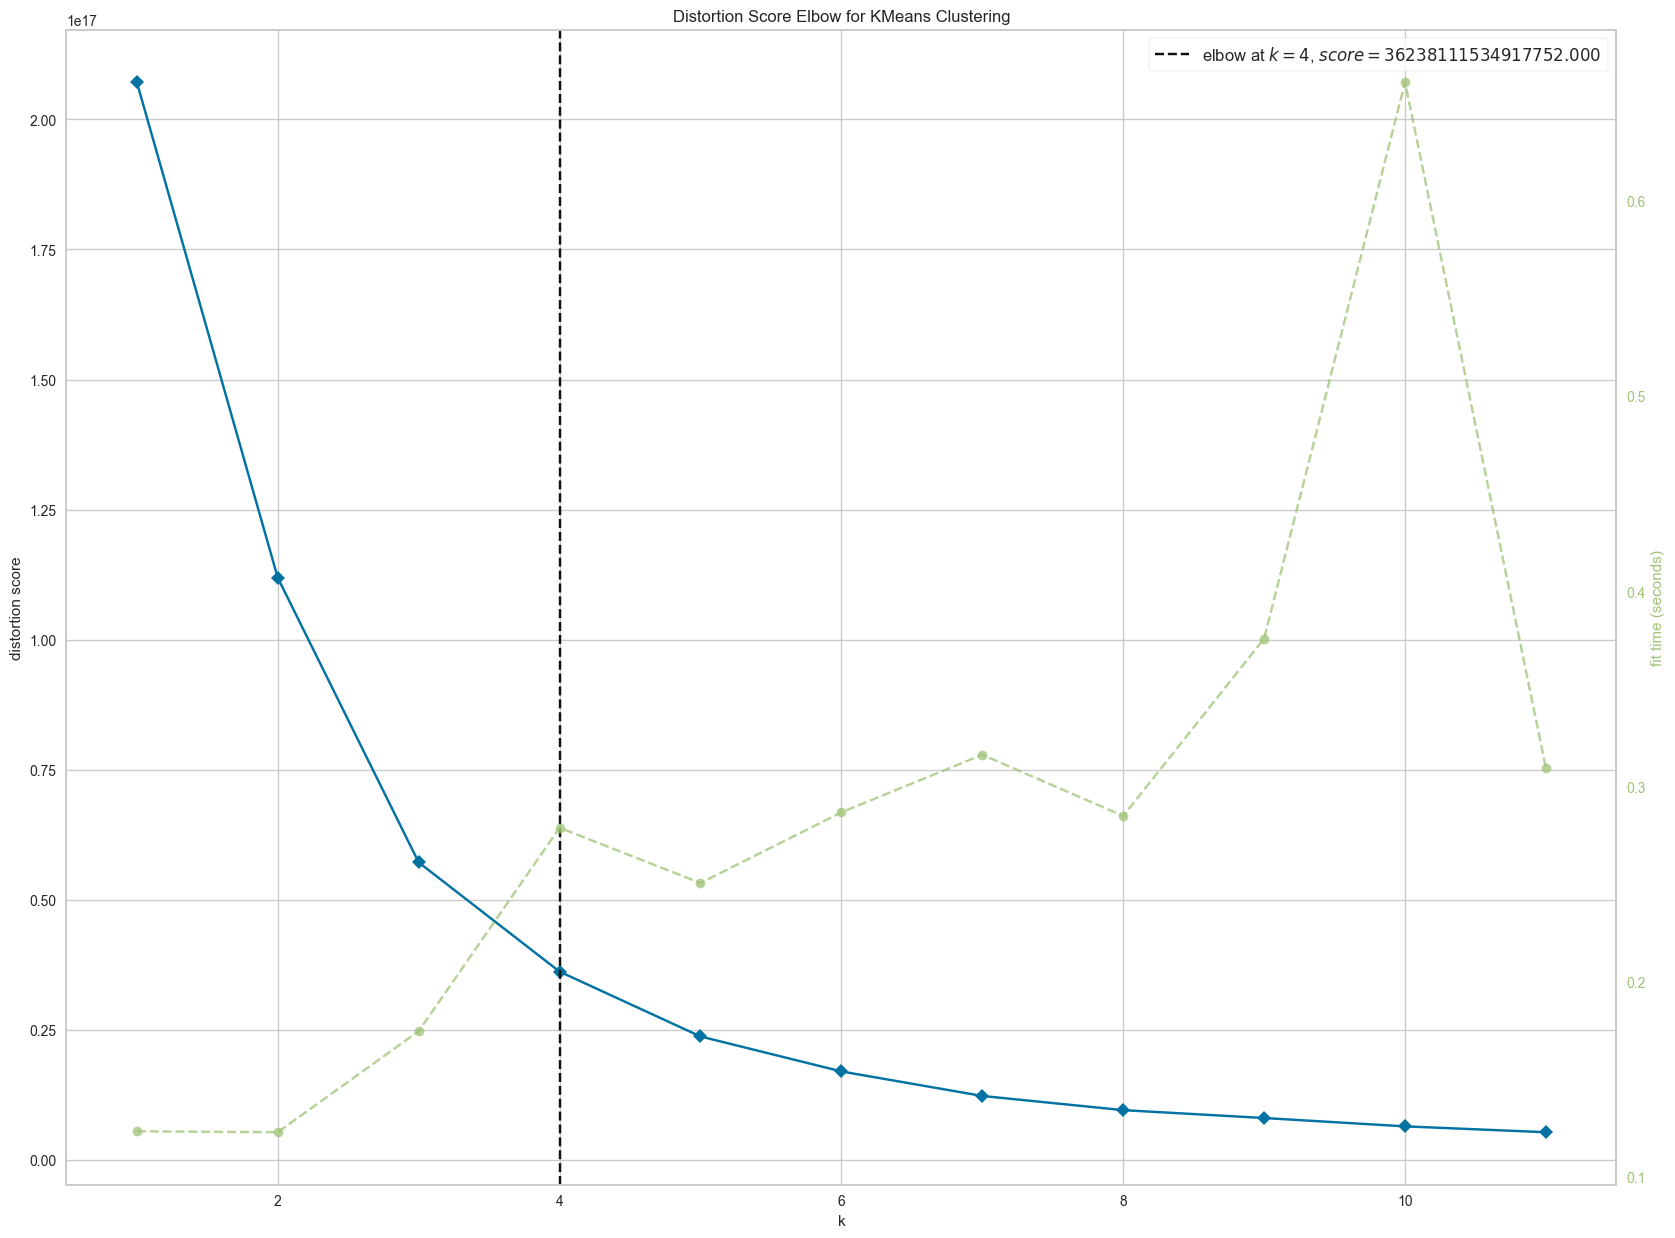

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
#Extracting segments
# Applying the Elbow Method

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(train_csv)
visualizer.show()

In [117]:
x_scaled = preprocessing.scale(train_csv)

# K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x_scaled)

# Adding the cluster labels to the  DataFrame
train_csv['cluster_num'] = kmeans.labels_

# Print the cluster labels for each data point
print(kmeans.labels_)

# Print the inertia 
print("Inertia (Within-cluster sum of squares):", kmeans.inertia_)

# Print the number of iterations the algorithm ran
print("Number of iterations:", kmeans.n_iter_)

# coordinates of the centroids for each cluster
print("Cluster centers (Centroids):")
print(kmeans.cluster_centers_)


[2 3 2 ... 2 2 1]
Inertia (Within-cluster sum of squares): 1813141.686865469
Number of iterations: 13
Cluster centers (Centroids):
[[ 0.06989843 -0.14957522  0.30803724  0.01569601  0.57568932  2.30950853
   1.19861032  2.21539058  1.9147454   0.37804853 -0.04046594]
 [ 1.52352599  2.03174505 -0.63919465  0.27653646 -0.29934839 -0.24702251
  -0.10248294 -0.19501093 -0.12410451 -0.21100786  0.10257852]
 [-0.26335736 -0.28625402  0.01810974  0.00307837 -0.76665175 -0.41575477
  -0.16369449 -0.3253669  -0.22765099 -0.50681817  0.03462676]
 [-0.1687952  -0.27191066  0.13898174 -0.10595441  1.11700252  0.23627465
   0.03700988  0.10388844 -0.00465733  0.7435954  -0.0792125 ]]


In [ ]:
from collections import Counter
Counter(kmeans.labels_)

In [118]:
x_scaled = preprocessing.scale(train_csv)

# Perform PCA with 2 components 
pca = PCA(n_components=2)
pc = pca.fit_transform(x_scaled)
# K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x_scaled)

# Create a DataFrame for the PCA scores with 'pc1' and 'pc2'
pf = pd.DataFrame(data=pc, columns=['pc1', 'pc2'])
pf['cluster_num'] = kmeans.labels_  

# Visualizing the clusters in the PCA 
sns.scatterplot(data=pf, x="pc1", y="pc2", hue="cluster_num", palette="Set2", s=100)

# Plotting the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="Centroids")

# Adding title and legend
plt.title("Cluster Visualization in PCA Space", fontsize=16)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.legend()

# Show the plot
plt.show()


In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


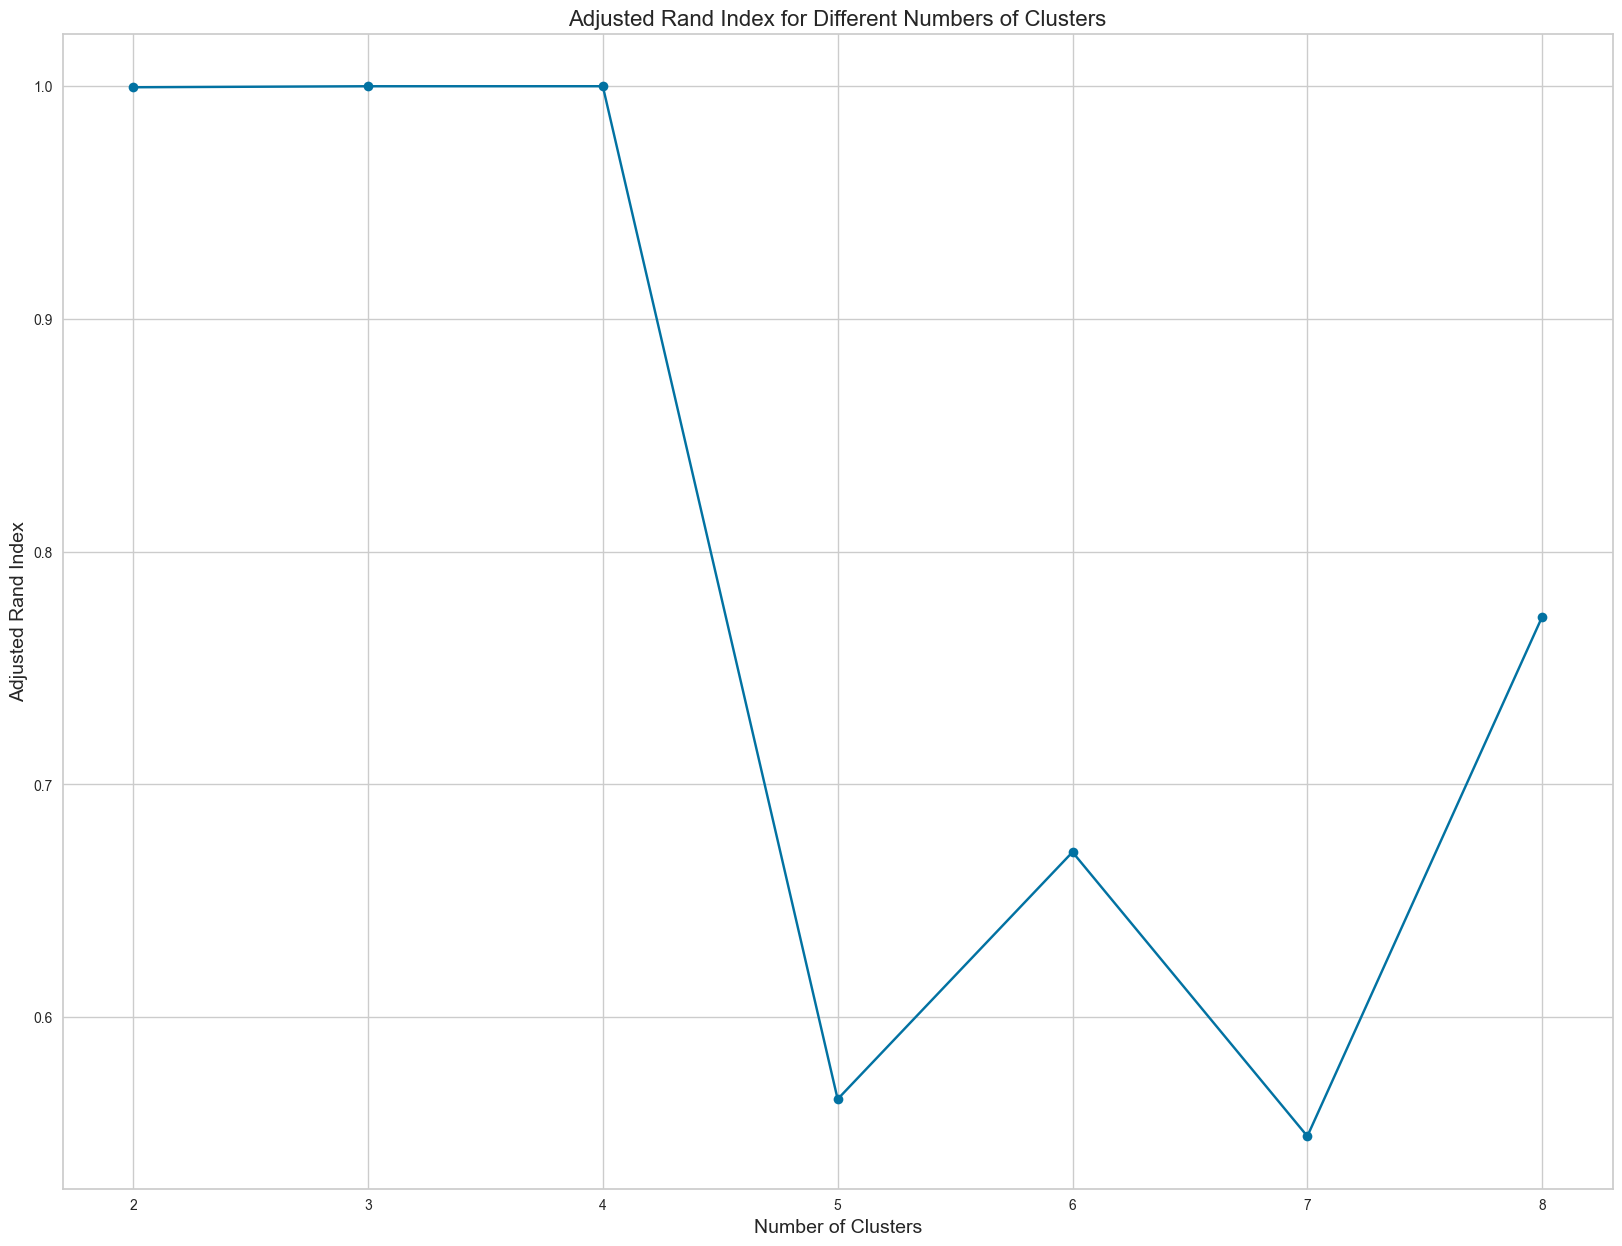

In [120]:
from sklearn.metrics import adjusted_rand_score


# Assuming 'train_csv' contains the numeric data for clustering
x_scaled = preprocessing.scale(train_csv)

# random seed for reproducibility
np.random.seed(1234)

# Perform K-means clustering 
n_clusters = range(2, 9)
n_reps = 10
scores = []

for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps, random_state=1234).fit(x_scaled)
    km_labels = km.labels_
    
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1, random_state=1234).fit(x_scaled)
        km_rep_labels = km_rep.labels_
        
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    
    scores.append(score_k)

# Plot the mean and standard deviation of Adjusted Rand Index 
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-", color='b')
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Adjusted Rand Index", fontsize=14)
plt.title("Adjusted Rand Index for Different Numbers of Clusters", fontsize=16)
plt.show()


In [121]:
# Count the frequency of each value in a specific column 
employment_type_counts = train_csv["Employment.Type"].value_counts()
employment_type_counts = employment_type_counts.iloc[::-1]
print(employment_type_counts)


2      7661
0     97858
1    127635
Name: Employment.Type, dtype: int64


In [122]:
# Convert a  'PERFORM_CNS.SCORE' to numeric and subtract from 6 to create a new column
train_csv["PERFORM_CNS.SCORE.n"] = 6 - pd.to_numeric(train_csv["PERFORM_CNS.SCORE"], errors="coerce")

# Count the frequency of each value in the new column 'PERFORM_CNS.SCORE.n'
score_n_counts = train_csv["PERFORM_CNS.SCORE.n"].value_counts()
print(score_n_counts)


 6      116950
-1        8776
-439      8662
-526      7393
 3        3765
         ...  
-556         1
-535         1
-539         1
-538         1
-558         1
Name: PERFORM_CNS.SCORE.n, Length: 573, dtype: int64


### Profiling Segment

In [123]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [124]:
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler


# Standardize the data 
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_csv)
# Transpose the data to compute pairwise distances between columns
D = np.transpose(train_scaled)
# Compute the hierarchical clustering using the average method
D_linkage = linkage(D, method="average")

# Print the linkage matrix
print(D_linkage)


[[  0.           1.         339.60675162   2.        ]
 [  5.           7.         464.33876958   2.        ]
 [  4.           9.         532.50617083   2.        ]
 [ 11.          15.         559.53419315   3.        ]
 [  6.          14.         590.779079     3.        ]
 [  8.          17.         592.16293931   4.        ]
 [  2.          10.         648.46968001   2.        ]
 [  3.          12.         659.09851688   2.        ]
 [ 13.          19.         662.95871258   4.        ]
 [ 16.          18.         664.69202197   7.        ]
 [ 20.          21.         680.62924732   6.        ]
 [ 22.          23.         706.42357329  13.        ]]


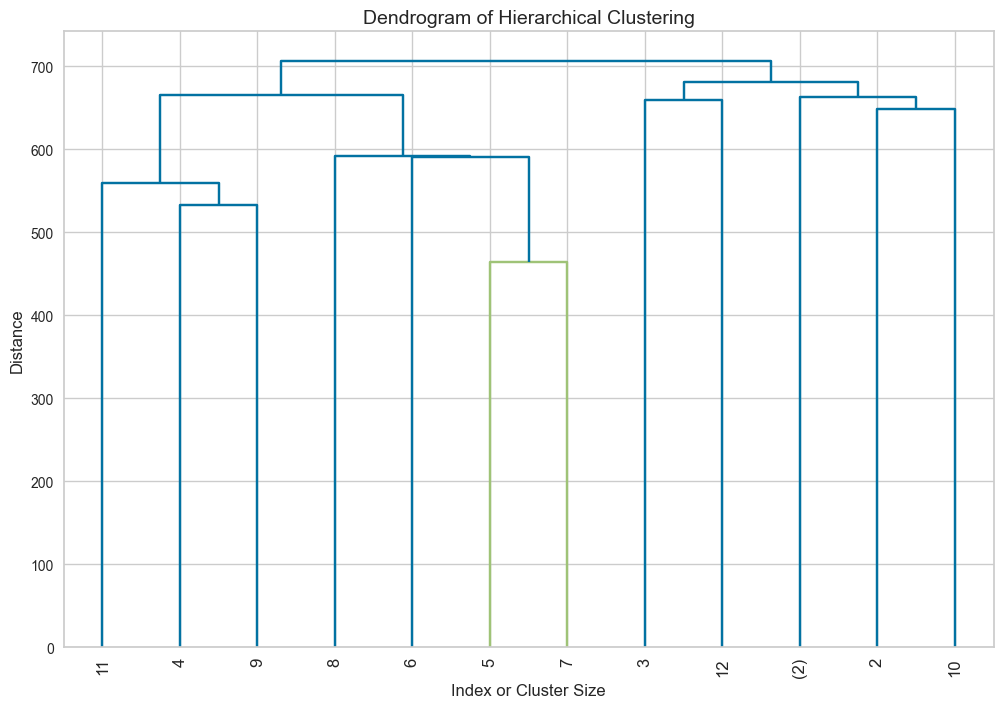

In [125]:
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(12, 8))  
dendrogram(D_linkage, 
           truncate_mode="lastp",   
           p=12,                   
           leaf_rotation=90,       
           leaf_font_size=12,      
           show_contracted=True)   

# Add title and labels
plt.title("Dendrogram of Hierarchical Clustering", fontsize=14)
plt.xlabel("Index or Cluster Size", fontsize=12)
plt.ylabel("Distance", fontsize=12)

# Show the plot
plt.show()


In [126]:
# Standardize the data 
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_csv)

# Perform PCA and get the first two principal components
pca = PCA(n_components=2)
proj_data = pca.fit_transform(train_scaled)

# Plot the scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7, c='blue')  # You can change the color as needed
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Principal Components")
plt.show()


### Describing Segment

In [127]:
from statsmodels.graphics.mosaicplot import mosaic
# Create a crosstab between 'cluster_num' and 'Employment.Type' 
crosstab = pd.crosstab(train_csv['cluster_num'], train_csv['Employment.Type'])

# Plot the mosaic plot 
plt.figure(figsize=(10, 8), dpi=150)  
mosaic(crosstab.stack(), title="Mosaic Plot: Cluster vs Employment Type")

plt.show()


<Figure size 1500x1200 with 0 Axes>

Employment.Type      0      1     2
cluster_num                        
0                 6168   8875   345
1                 8367  17086  1941
2                47650  61544  4038
3                35673  40130  1337


<Figure size 1500x1200 with 0 Axes>

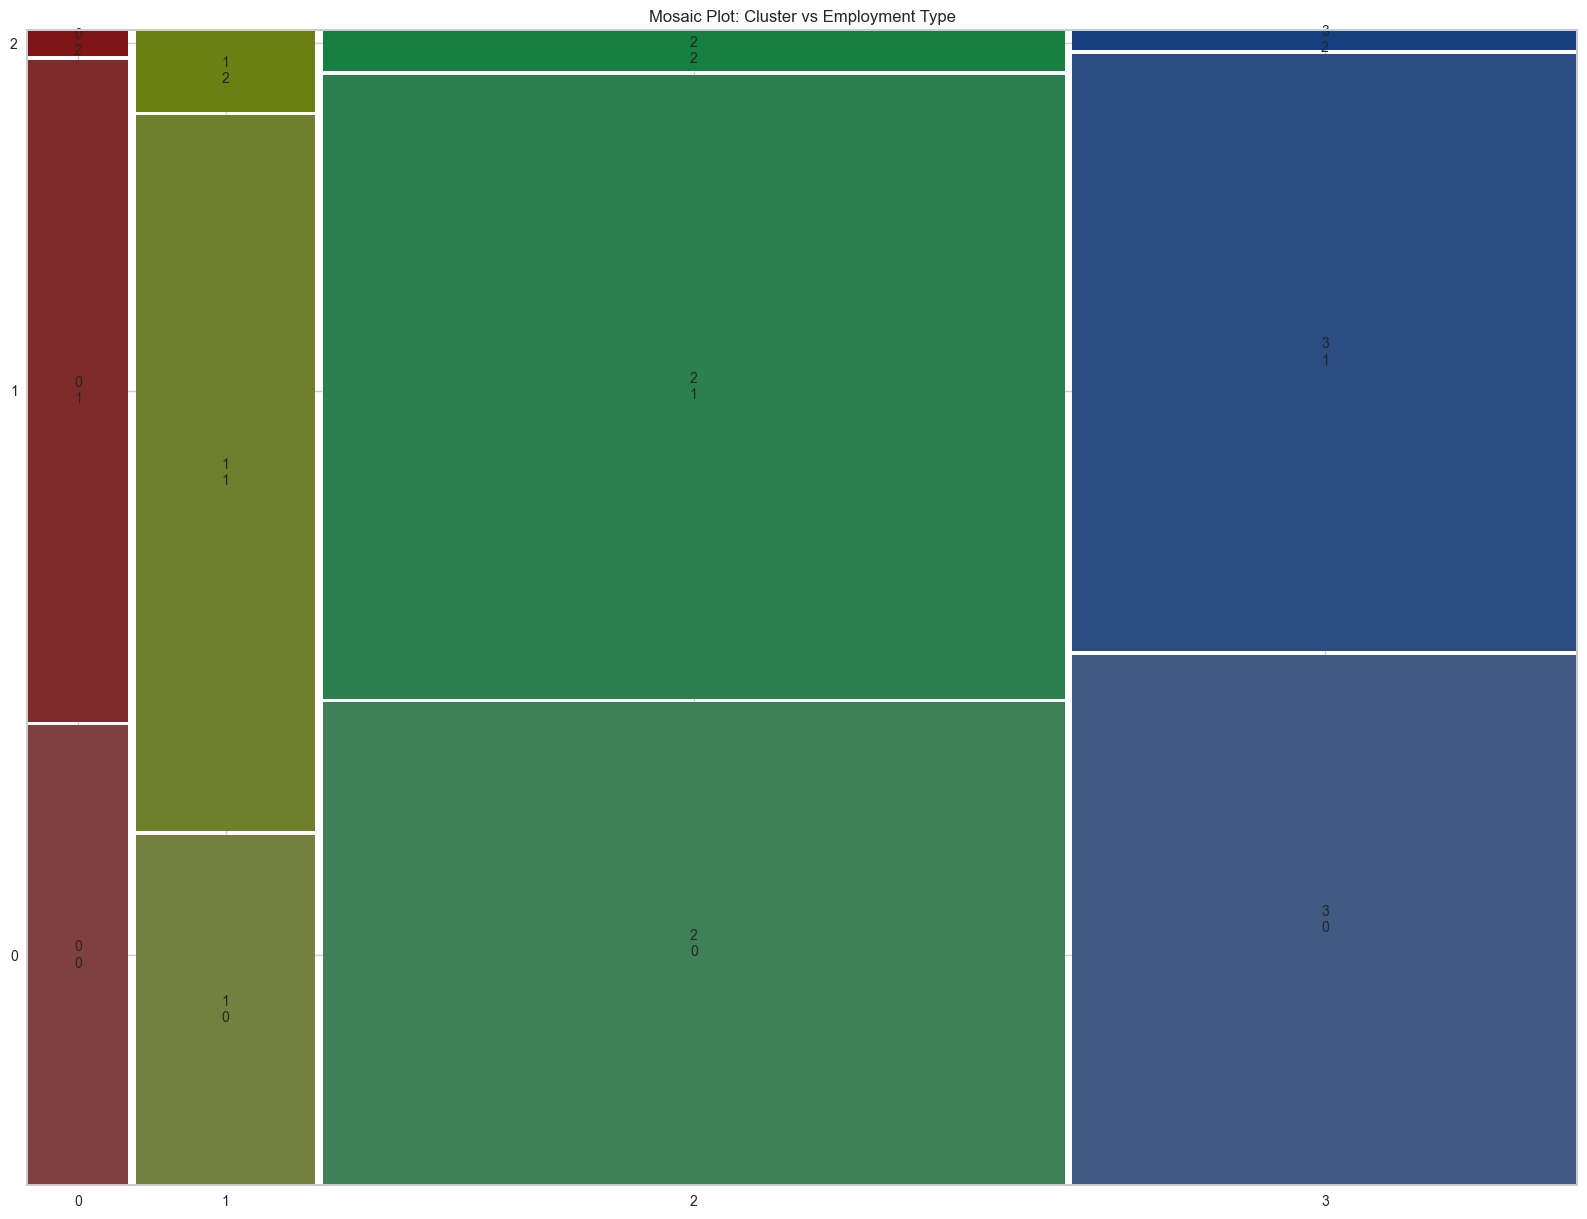

In [128]:


# Create a crosstab between 'cluster_num' and 'Employment.Type'
crosstab_employment = pd.crosstab(train_csv['cluster_num'], train_csv['Employment.Type'])

# Print the crosstab to inspect the data
print(crosstab_employment)

# Plot the mosaic plot
plt.figure(figsize=(10, 8), dpi=150)  
mosaic(crosstab_employment.stack(), title="Mosaic Plot: Cluster vs Employment Type")

plt.show()


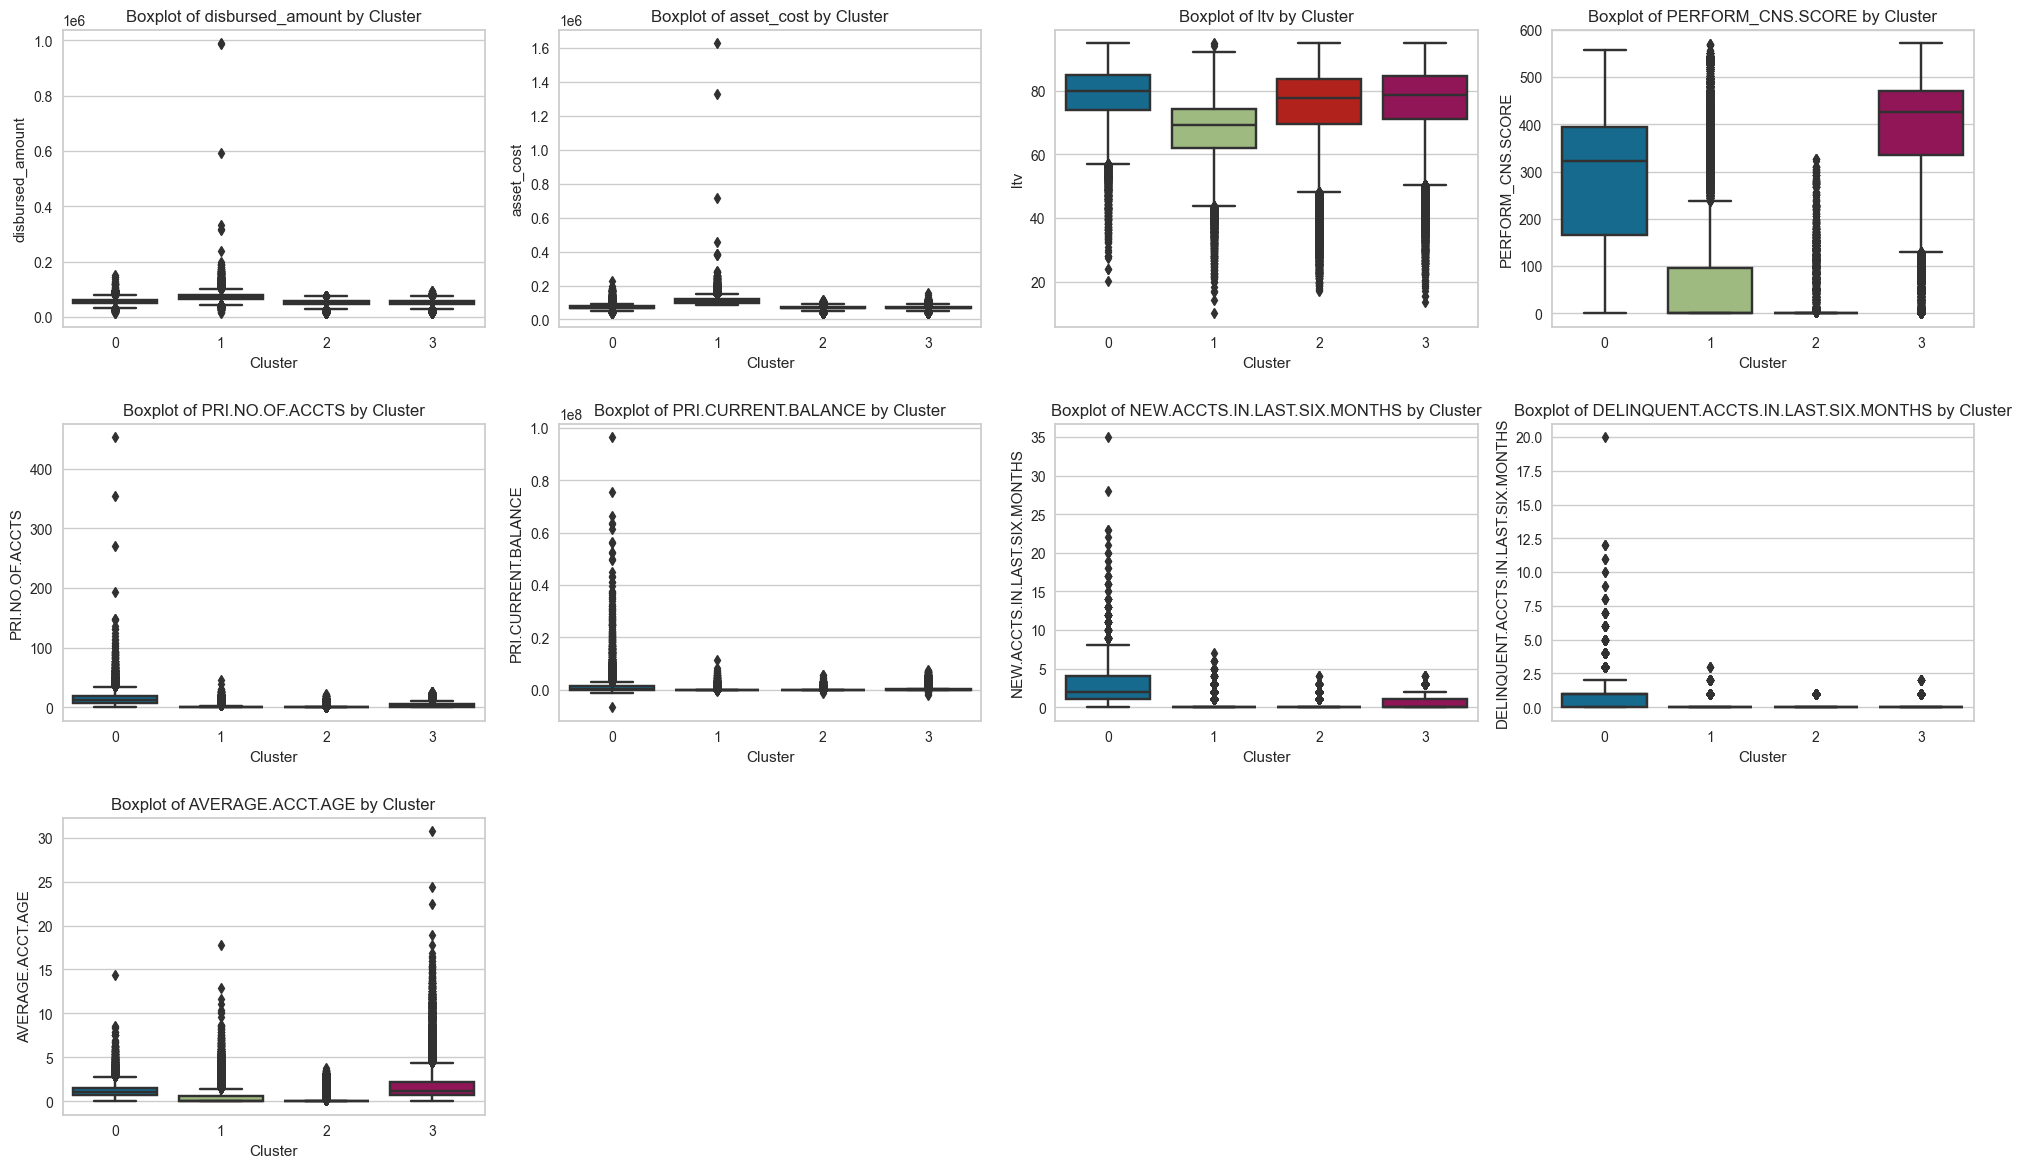

In [129]:
# List of numeric columns from your dataset
numeric_columns = ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 
                   'PRI.CURRENT.BALANCE', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 
                   'AVERAGE.ACCT.AGE' ]

# Set up the plot grid (2 rows and 5 columns)
plt.figure(figsize=(20, 12))

# Loop through each numeric column and create a boxplot
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)  # Create a subplot for each boxplot
    sns.boxplot(x='cluster_num', y=column, data=train_csv)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [130]:
# Boxplot for 'PERFORM_CNS.SCORE' grouped by 'cluster_num'
sns.boxplot(x="cluster_num", y="PERFORM_CNS.SCORE", data=train_csv)

# Set the title and labels
plt.title('Boxplot of PERFORM_CNS.SCORE by Cluster')
plt.xlabel('Cluster')
plt.ylabel('PERFORM_CNS.SCORE')

# Show the plot
plt.show()


In [131]:
from sklearn.preprocessing import LabelEncoder

# Replace 'Employment.Type' with the name of the column you want to encode
train_csv['EncodedEmploymentType'] = LabelEncoder().fit_transform(train_csv['Employment.Type'])

# Group by 'cluster_num' and calculate the mean of the encoded column
mean_values = train_csv.groupby('cluster_num')['EncodedEmploymentType'].mean()

# Reset index and view the result
mean_values = mean_values.to_frame().reset_index()

# Display the result
print(mean_values)


   cluster_num  EncodedEmploymentType
0            0               0.621588
1            1               0.765423
2            2               0.614844
3            3               0.554887


In [132]:
# Replace 'PERFORM_CNS.SCORE' with the actual column you want to encode
train_csv['PERFORM_CNS.SCORE'] = LabelEncoder().fit_transform(train_csv['PERFORM_CNS.SCORE'])

# Group by 'cluster_num' and calculate the mean of the encoded column
mean_values = train_csv.groupby('cluster_num')['PERFORM_CNS.SCORE'].mean()

# Reset index and view the result
mean_values = mean_values.to_frame().reset_index()

# Display the result
print(mean_values)


   cluster_num  PERFORM_CNS.SCORE
0            0         276.804783
1            1          97.658283
2            2           1.831814
3            3         387.658387


In [133]:
# Label encode the 'Employment.Type' column
train_csv['Employment.Type'] = LabelEncoder().fit_transform(train_csv['Employment.Type'])

# Calculate the mean of the encoded 'Employment.Type' by 'cluster_num'
employment_mean = train_csv.groupby('cluster_num')['Employment.Type'].mean().reset_index()

# Print the result
print(employment_mean)


   cluster_num  Employment.Type
0            0         0.621588
1            1         0.765423
2            2         0.614844
3            3         0.554887


In [134]:
# Calculate mean for specific columns by 'cluster_num'
employment = train_csv.groupby('cluster_num')['Employment.Type'].mean().reset_index()
score = train_csv.groupby('cluster_num')['PERFORM_CNS.SCORE'].mean().reset_index()
accounts = train_csv.groupby('cluster_num')['PRI.NO.OF.ACCTS'].mean().reset_index()

# Merge them into one DataFrame
segment = employment.merge(score, on='cluster_num', how='left').merge(accounts, on='cluster_num', how='left')

# Display the resulting DataFrame
print(segment)


   cluster_num  Employment.Type  PERFORM_CNS.SCORE  PRI.NO.OF.ACCTS
0            0         0.621588         276.804783        14.502274
1            1         0.765423          97.658283         1.151931
2            2         0.614844           1.831814         0.271346
3            3         0.554887         387.658387         3.676458


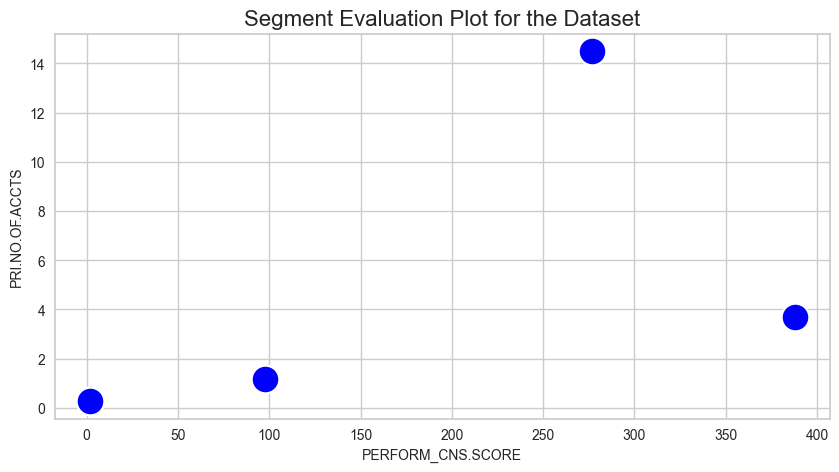

In [135]:
# Scatter plot for 'PERFORM_CNS.SCORE' vs 'PRI.NO.OF.ACCTS' 
plt.figure(figsize = (10,5))
sns.scatterplot(x = "PERFORM_CNS.SCORE", y = "PRI.NO.OF.ACCTS", data=segment, s=400, color="blue")
plt.title("Segment Evaluation Plot for the Dataset", fontsize = 16)
plt.xlabel("PERFORM_CNS.SCORE", fontsize = 10)
plt.ylabel("PRI.NO.OF.ACCTS", fontsize = 10)
plt.show()
